# I. Importing libraries and dataset 

In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
import re
from src import plot_by_woe
from src import woe_discrete
from src import woe_ordered_continuous
import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_columns = None

In [2]:
loan_data_backup = pd.read_csv("loan_data_2007_2014.csv")
df = loan_data_backup.copy()

# II. Data exploratory


In [3]:
df.head()

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade sub_grade  \
0   36 months     10.65       162.87     B        B2   
1   60 months     15.27        59.83     C        C4   
2   36 months     15.96        84.33     C        C5   
3   36 months     13.49       339.31     C        C1   
4   60 months     12.69        67.79     B        B5   

                  emp_title emp_length home_ownership  annual_inc  \
0                       NaN  10+ years           RENT     24000.0   
1                     Ryder   < 1 year           RENT     30000.0   
2                       NaN  10+ years           RENT     12252.0   
3       AIR RESOURCES BOARD  10+ years           RENT     49200.0   
4  University Medical Group     1 year           RENT     80000.0   

  verification_status issue_d  loan_status pymnt_plan  \
0            Verified  Dec-11   Fully Paid          n   
1     Source Verified  Dec-11  Charged Off          n   
2        Not Verified  Dec-11   Fully Paid          n   
3     Source Verified  Dec-11   Fully Paid          n   
4     Source Verified  Dec-11      Current          n   

                                                 url  \
0  https://www.lendingclub.com/browse/loanDetail....   
1  https://www.lendingclub.com/browse/loanDetail....   
2  https://www.lendingclub.com/browse/loanDetail....   
3  https://www.lendingclub.com/browse/loanDetail....   
4  https://www.lendingclub.com/browse/loanDetail....   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65          0.0   
1                  bike    309xx         GA   1.00          0.0   
2  real estate business    606xx         IL   8.72          0.0   
3              personel    917xx         CA  20.00          0.0   
4              Personal    972xx         OR  17.94          0.0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85             1.0                     NaN   
1           Apr-99             5.0                     NaN   
2           Nov-01             2.0                     NaN   
3           Feb-96             1.0                    35.0   
4           Jan-96             0.0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN       3.0      0.0      13648        83.7   
1                     NaN       3.0      0.0       1687         9.4   
2                     NaN       2.0      0.0       2956        98.5   
3                     NaN      10.0      0.0       5598        21.0   
4                     NaN      15.0      0.0      27783        53.9   

   total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0        9.0                   f        0.0            0.0   5861.071414   
1        4.0                   f        0.0            0.0   1008.710000   
2       10.0                   f        0.0            0.0   3003.653644   
3       37.0                   f        0.0            0.0  12226.302210   
4       38.0                   f      766.9          766.9   3242.170000   

   total_

In [4]:
df.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

# III. Data preprocessing 

## 1. Drop redundant variables 

Variables with only one unique value or those with too many unique values (such as IDs or URLs) are removed, as they carry little predictive power.

In [6]:
df.drop(['Unnamed: 0', 'id', 'member_id', 'url', 'policy_code', 'application_type'], axis=1, inplace=True)

## 2. Datetime Processing 

### 2.1. emp_length 

In [7]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [8]:
df['emp_length'] = df['emp_length'].fillna('0')
df['emp_length'] = df['emp_length'].str.replace(r'\+ years', '', regex=True)
df['emp_length'] = df['emp_length'].str.replace(r' years?', '', regex=True)
df['emp_length'] = df['emp_length'].str.replace(r'< 1', '0', regex=True)
df['emp_length'] = pd.to_numeric(df['emp_length'], errors='coerce').fillna(0).astype(int)

In [9]:
df['emp_length'].unique()

array([10,  0,  1,  3,  8,  9,  4,  5,  6,  2,  7])

### 2.2. earliest cr line 

In [10]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format = '%b-%y')

In [11]:
cutoff_date = pd.Timestamp('2017-12-01')

df.loc[(df['earliest_cr_line'] > cutoff_date) & (df['earliest_cr_line'].dt.year > 2020), 'earliest_cr_line'] = \
    df['earliest_cr_line'] - pd.DateOffset(years=100)

In [12]:
df['earliest_cr_line']

0        1985-01-01
1        1999-04-01
2        2001-11-01
3        1996-02-01
4        1996-01-01
            ...    
466280   2003-04-01
466281   1997-06-01
466282   2001-12-01
466283   2003-02-01
466284   2000-02-01
Name: earliest_cr_line, Length: 466285, dtype: datetime64[ns]

In [13]:
pd.to_datetime('2017-12-01') - df['earliest_cr_line']

0        12022 days
1         6819 days
2         5874 days
3         7974 days
4         8005 days
            ...    
466280    5358 days
466281    7488 days
466282    5844 days
466283    5417 days
466284    6513 days
Name: earliest_cr_line, Length: 466285, dtype: timedelta64[ns]

In [14]:
df['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['earliest_cr_line']) / np.timedelta64(1, 'D') / 30.44))

In [15]:
df['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        242.491078
std          86.928944
min          73.000000
25%         184.000000
50%         226.000000
75%         285.000000
max         887.000000
Name: mths_since_earliest_cr_line, dtype: float64

### 2.3. term

In [16]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [17]:
df['term_int'] = df['term'].str.replace(r'\D', '', regex=True)
df['term_int'] = pd.to_numeric(df['term_int'])

In [18]:
df['term_int']

0         36
1         60
2         36
3         36
4         60
          ..
466280    60
466281    60
466282    60
466283    36
466284    36
Name: term_int, Length: 466285, dtype: int64

In [19]:
df['term_int'].unique()

array([36, 60], dtype=int64)

### 2.4. issue_d

In [20]:
df['issue_d'].unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Sep-07', 'Aug-07', 'Jul-07',
       'Jun-07', 'Dec-13', 'Nov-13', 'Oct-13', 'Sep-13', 'Aug-13',
       'Jul-13', 'Jun-13', 'May-13', 'Apr-13', 'Mar-13', 'Feb-13',
       'Jan-13', 'Dec-12', 'Nov-12', 'Oct-12', 'Sep-12', 'Aug-12',
       'Jul-12', 'Jun-12', 'May-12', 'Apr-12', 'Mar-12', 'Feb-12',
       'Jan-12', 'Dec-14', 'Nov-14', 'Oct-14', 'Sep-14', 'Aug-14',
       'Jul-14', 'Jun-14', 'May-14', 'Apr-14', 'Mar-14', 'Feb-

In [21]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')

In [22]:
df['mths_since_issue_d'] = round((pd.to_datetime('2017-12-01', format='%Y-%m-%d') - df['issue_d']) / np.timedelta64(1, 'D') / 30.44)

In [23]:
df['mths_since_issue_d'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64

## 3. Encoding

In [24]:
pd.get_dummies(df['grade'])

A      B      C      D      E      F      G
0       False   True  False  False  False  False  False
1       False  False   True  False  False  False  False
2       False  False   True  False  False  False  False
3       False  False   True  False  False  False  False
4       False   True  False  False  False  False  False
...       ...    ...    ...    ...    ...    ...    ...
466280  False  False   True  False  False  False  False
466281  False  False  False   True  False  False  False
466282  False  False  False   True  False  False  False
466283   True  False  False  False  False  False  False
466284  False  False  False   True  False  False  False

[466285 rows x 7 columns]

In [25]:
df_dummies = [pd.get_dummies(df['grade'], prefix='grade', prefix_sep=':').astype(int),
              pd.get_dummies(df['sub_grade'], prefix='sub_grade', prefix_sep=':').astype(int),
              pd.get_dummies(df['home_ownership'], prefix='home_ownership', prefix_sep=':').astype(int),
              pd.get_dummies(df['verification_status'], prefix='verification_status', prefix_sep=':').astype(int),
              pd.get_dummies(df['loan_status'], prefix='loan_status', prefix_sep=':').astype(int),
              pd.get_dummies(df['purpose'], prefix='purpose', prefix_sep=':').astype(int),
              pd.get_dummies(df['addr_state'], prefix='addr_state', prefix_sep=':').astype(int),
              pd.get_dummies(df['initial_list_status'], prefix='initial_list_status', prefix_sep=':').astype(int)]

In [26]:
df_dummies = pd.concat(df_dummies, axis = 1)

In [27]:
type(df_dummies)

pandas.core.frame.DataFrame

In [28]:
df = pd.concat([df, df_dummies], axis = 1)

In [29]:
df.columns.values

array(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc

## 4. Missing value

In [30]:
df.isnull()

loan_amnt  funded_amnt  funded_amnt_inv   term  int_rate  installment  \
0           False        False            False  False     False        False   
1           False        False            False  False     False        False   
2           False        False            False  False     False        False   
3           False        False            False  False     False        False   
4           False        False            False  False     False        False   
...           ...          ...              ...    ...       ...          ...   
466280      False        False            False  False     False        False   
466281      False        False            False  False     False        False   
466282      False        False            False  False     False        False   
466283      False        False            False  False     False        False   
466284      False        False            False  False     False        False   

        grade  sub_grade  emp_title  emp_length  home_ownership  annual_inc  \
0       False      False       True       False           False       False   
1       False      False      False       False           False       False   
2       False      False       True       False           False       False   
3       False      False      False       False           False       False   
4       False      False      False       False           False       False   
...       ...        ...        ...         ...             ...         ...   
466280  False      False      False       False           False       False   
466281  False      False      False       False           False       False   
466282  False      False      False       False           False       False   
466283  False      False      False       False           False       False   
466284  False      False       True       False           False       False   

        verification_status  issue_d  loan_status  pymnt_plan   desc  purpose  \
0                     False    False        False       False  False    False   
1                     False    False        False       False  False    False   
2                     False    False        False       False   True    False   
3                     False    False        False       False  False    False   
4                     False    False        False       False  False    False   
...                     ...      ...          ...         ...    ...      ...   
466280                False    False        False       False   True    False   
466281                False    False        False       False   True    False   
466282                False    False        False       False  False    False   
466283                False    False        False       False   True    False   
466284                False    False        False       False  False    False   

        title  zip_code  addr_state    dti  delinq_2yrs  earliest_cr_line  \
0       False     False       False  False        False             False   
1       False     False       False  False        False             False   
2       False     False       False  False        False             False   
3       False     False       False  False        False             False   
4       False     False       False  False        False             False   
...       ...       ...         ...    ...          ...               ...   
466280  False     False       False  False        False             False   
466281  False     False       False  False        False             False   
466282  False     False       False  False        False             False   
466283  False     False       False  False        False             False   
466284  False     False       False  False        False             False   

        inq_last_6mths  mths_since_last_delinq  mths_since_last_record  \
0                False                    True                    True   
1                False                  

In [31]:
pd.options.display.max_rows = None
df.isnull().sum()

loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           27588
emp_length                                                              0
home_ownership                                                          0
annual_inc                                                              4
verification_status                                                     0
issue_d                               

Features with all missing (null) values are also excluded from the dataset.

In [32]:
null_cols = []

for i in df.columns:
    if df[i].notna().sum() == 0:
        null_cols.append(i)
    elif df[i].nunique() == 1:
        null_cols.append(i)

df.drop(null_cols, axis=1, inplace=True)

The remaining variables/features include:

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Columns: 181 entries, loan_amnt to initial_list_status:w
dtypes: datetime64[ns](2), float64(31), int32(127), int64(4), object(17)
memory usage: 418.0+ MB


In [34]:
df['total_rev_hi_lim'].fillna(df['funded_amnt'], inplace = True)
df['annual_inc'].fillna(df['annual_inc'].mean(), inplace=True)
df['mths_since_earliest_cr_line'].fillna(0, inplace=True)
df['acc_now_delinq'].fillna(0, inplace=True)    
df['total_acc'].fillna(0, inplace=True)
df['pub_rec'].fillna(0, inplace=True)
df['open_acc'].fillna(0, inplace=True)
df['inq_last_6mths'].fillna(0, inplace=True)
df['delinq_2yrs'].fillna(0, inplace=True)
df['emp_length'].fillna(0, inplace=True)

## 5. Dependent variable

In [35]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [36]:
df['good_bad'] = np.where(df['loan_status'].isin(['Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off', 'Late (31-120 days)']), 0, 1)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('good_bad', axis = 1), df['good_bad'], test_size = 0.2, random_state = 42)
# df_inputs_prepr = X_train
# df_targets_prepr = y_train
df_inputs_prepr = X_test
df_targets_prepr = y_test

## 6. Feature transformation

### 6.1. Discrete variables

WoE calculation -> coarse classing -> dummy encoding

#### 6.1.1. grade

In [38]:
df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
df_temp

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     G    668   0.697605    0.007163    466.0   202.0     0.005610   
1     F   2699   0.775472    0.028942   2093.0   606.0     0.025197   
2     E   7145   0.805178    0.076616   5753.0  1392.0     0.069257   
3     D  15390   0.844314    0.165028  12994.0  2396.0     0.156428   
4     C  25048   0.882905    0.268591  22115.0  2933.0     0.266231   
5     B  27199   0.923085    0.291656  25107.0  2092.0     0.302250   
6     A  15108   0.962338    0.162004  14539.0   569.0     0.175027   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.019823 -1.262323             NaN       NaN  0.300551  
1    0.059470 -0.858767        0.019587  0.403556  0.300551  
2    0.136605 -0.679261        0.044061  0.179506  0.300551  
3    0.235132 -0.407554        0.087171  0.271707  0.300551  
4    0.287831 -0.078010        0.109803  0.329543  0.300551  
5    0.205299  0.386785        0.036019  0.464796  0.300551  
6    0.055839  1.142469        0.127223  0.755683  0.300551

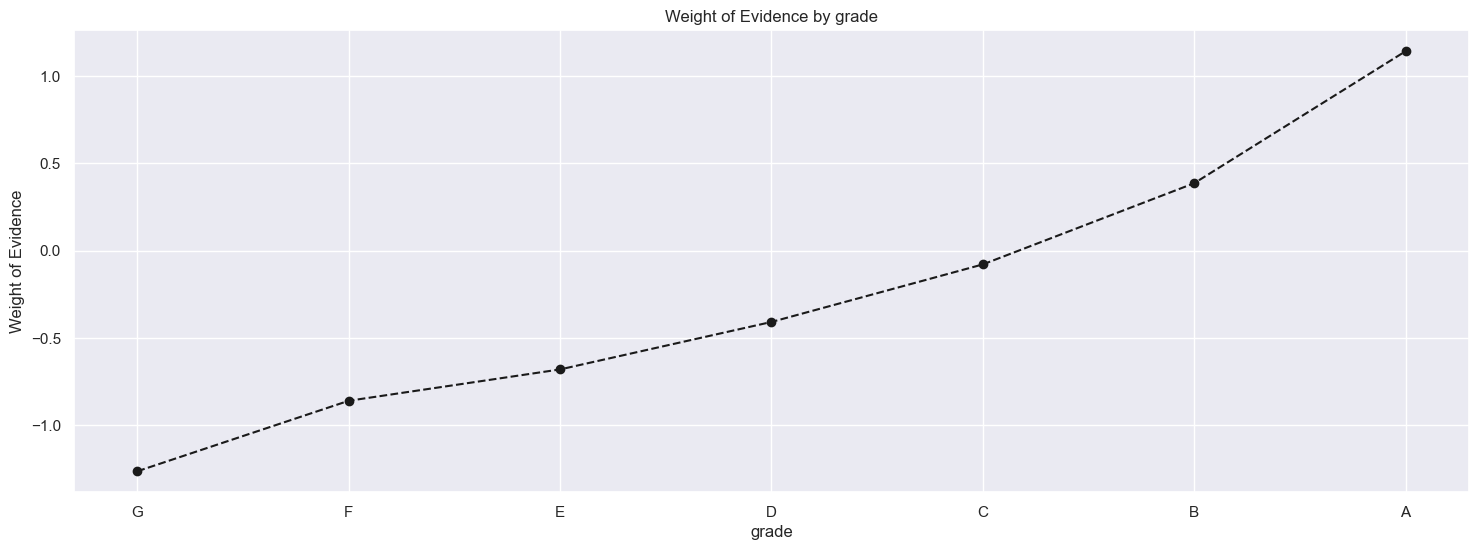

In [39]:
plot_by_woe(df_temp)

#### 6.1.2. home_ownership

In [40]:
df_temp= woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)
df_temp

home_ownership  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0          OTHER     45   0.777778    0.000483     35.0    10.0     0.000421   
1           NONE     10   0.800000    0.000107      8.0     2.0     0.000096   
2           RENT  37874   0.874003    0.406125  33102.0  4772.0     0.398498   
3            OWN   8409   0.888572    0.090170   7472.0   937.0     0.089951   
4       MORTGAGE  46919   0.904751    0.503115  42450.0  4469.0     0.511033   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.000981 -0.845478             NaN       NaN  0.022938  
1    0.000196 -0.711946        0.000325  0.133531  0.022938  
2    0.468302 -0.161412        0.398401  0.550534  0.022938  
3    0.091953 -0.022006        0.308546  0.139406  0.022938  
4    0.438567  0.152922        0.421082  0.174928  0.022938

Categories with very few loans, such as OTHER and NONE (each <0.1%) and ANY (only one observation), are combined with similar categories to address underrepresentation.

In [41]:
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'], df_inputs_prepr['home_ownership:OTHER'],
                                                            df_inputs_prepr['home_ownership:NONE'], df_inputs_prepr['home_ownership:ANY']])

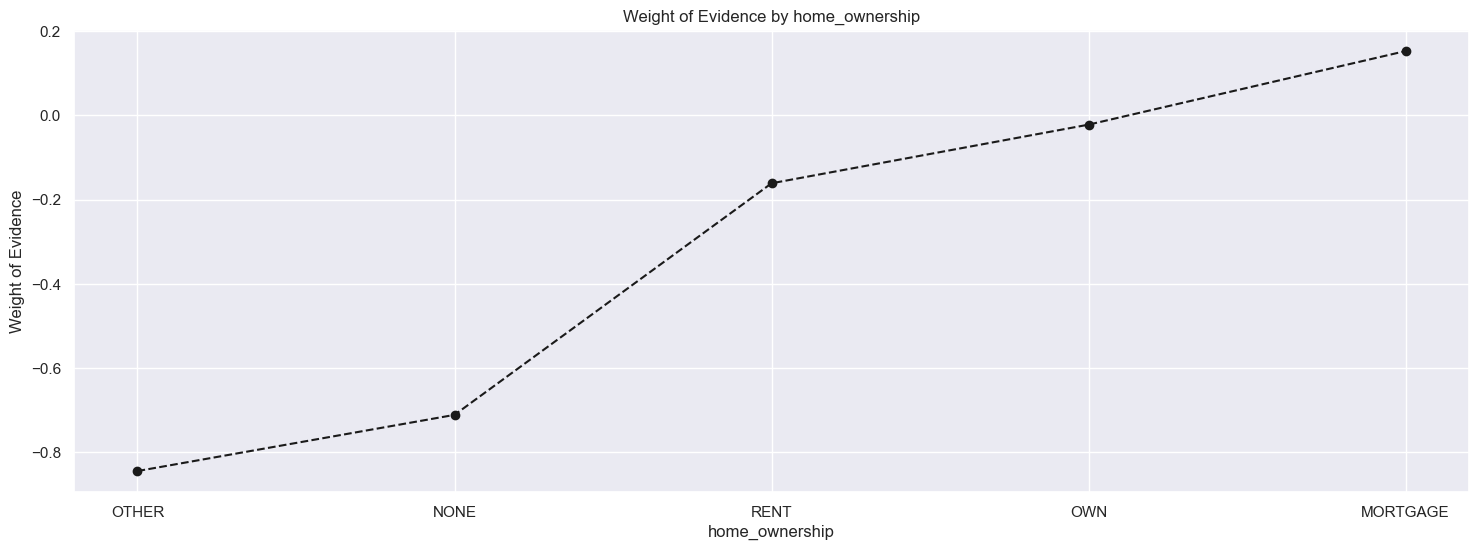

In [42]:
plot_by_woe(df_temp)

#### 6.1.3. addr_state

In [43]:
df_temp = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
df_temp

addr_state  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0          NE      1   0.000000    0.000011      0.0     1.0     0.000000   
1          ID      2   0.500000    0.000021      1.0     1.0     0.000012   
2          NV   1298   0.855932    0.013919   1111.0   187.0     0.013375   
3          HI    486   0.860082    0.005211    418.0    68.0     0.005032   
4          FL   6426   0.870059    0.068906   5591.0   835.0     0.067307   
5          AL   1182   0.873096    0.012675   1032.0   150.0     0.012424   
6          NJ   3676   0.875408    0.039418   3218.0   458.0     0.038740   
7          LA   1130   0.876106    0.012117    990.0   140.0     0.011918   
8          NY   8031   0.879965    0.086117   7067.0   964.0     0.085076   
9          RI    403   0.880893    0.004321    355.0    48.0     0.004274   
10         NC   2478   0.881759    0.026572   2185.0   293.0     0.026304   
11         MI   2358   0.882103    0.025285   2080.0   278.0     0.025040   
12         DE    208   0.884615    0.002230    184.0    24.0     0.002215   
13         MD   2203   0.884703    0.023623   1949.0   254.0     0.023463   
14         OK    833   0.885954    0.008932    738.0    95.0     0.008884   
15         MO   1491   0.885983    0.015988   1321.0   170.0     0.015903   
16         AR    728   0.887363    0.007806    646.0    82.0     0.007777   
17         PA   3334   0.888122    0.035751   2961.0   373.0     0.035646   
18         SD    179   0.888268    0.001919    159.0    20.0     0.001914   
19         AZ   2067   0.888728    0.022165   1837.0   230.0     0.022115   
20         NM    513   0.888889    0.005501    456.0    57.0     0.005490   
21         CA  14251   0.889411    0.152814  12675.0  1576.0     0.152588   
22         MA   2214   0.893857    0.023741   1979.0   235.0     0.023824   
23         GA   3015   0.893864    0.032330   2695.0   320.0     0.032444   
24         IN   1315   0.894297    0.014101   1176.0   139.0     0.014157   
25         VA   2856   0.894958    0.030625   2556.0   300.0     0.030770   
26         NH    402   0.895522    0.004311    360.0    42.0     0.004334   
27         OH   3102   0.895551    0.033263   2778.0   324.0     0.033443   
28         UT    672   0.895833    0.007206    602.0    70.0     0.007247   
29         WI   1171   0.896670    0.012557   1050.0   121.0     0.012640   
30         MN   1632   0.897059    0.017500   1464.0   168.0     0.017624   
31         WA   2145   0.899767    0.023001   1930.0   215.0     0.023234   
32         CO   1916   0.906054    0.020545   1736.0   180.0     0.020899   
33         TX   7281   0.906057    0.078075   6597.0   684.0     0.079418   
34         SC   1135   0.906608    0.012171   1029.0   106.0     0.012388   
35         TN   1139   0.906936    0.012214   1033.0   106.0     0.012436   
36         OR   1135   0.907489    0.012171   1030.0   105.0     0.012400   
37         IL   3779   0.908706    0.040522   3434.0   345.0     0.041340   
38         KY    851   0.909518    0.009125    774.0    77.0     0.009318   
39         CT   1429   0.909727    0.015323   1300.0   129.0     0.015650   
40         WV    486   0.917695    0.005211    446.0    40.0     0.005369   
41         WY    209   0.918660    0.002241    192.0    17.0     0.002311   
42         AK    248   0.919355    0.002659    228.0    20.0     0.002745   
43         KS    830   0.920482    0.008900    764.0    66.0     0.009197   
44         VT    178   0.921348    0.001909    164.0    14.0     0.001974   
45         DC    297   0.922559    0.003185    274.0    23.0     0.003299   
46         MS    246   0.922764    0.002638    227.0    19.0     0.002733   
47         MT    293   0.928328    0.003142    272.0    21.0     0.003274   
48         ME      2   1.000000    0.000021      2.0     0.0     0.000024   
49         IA      1   1.000000    0.000011      1.0     0.0     0.000012   

    prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.000098   

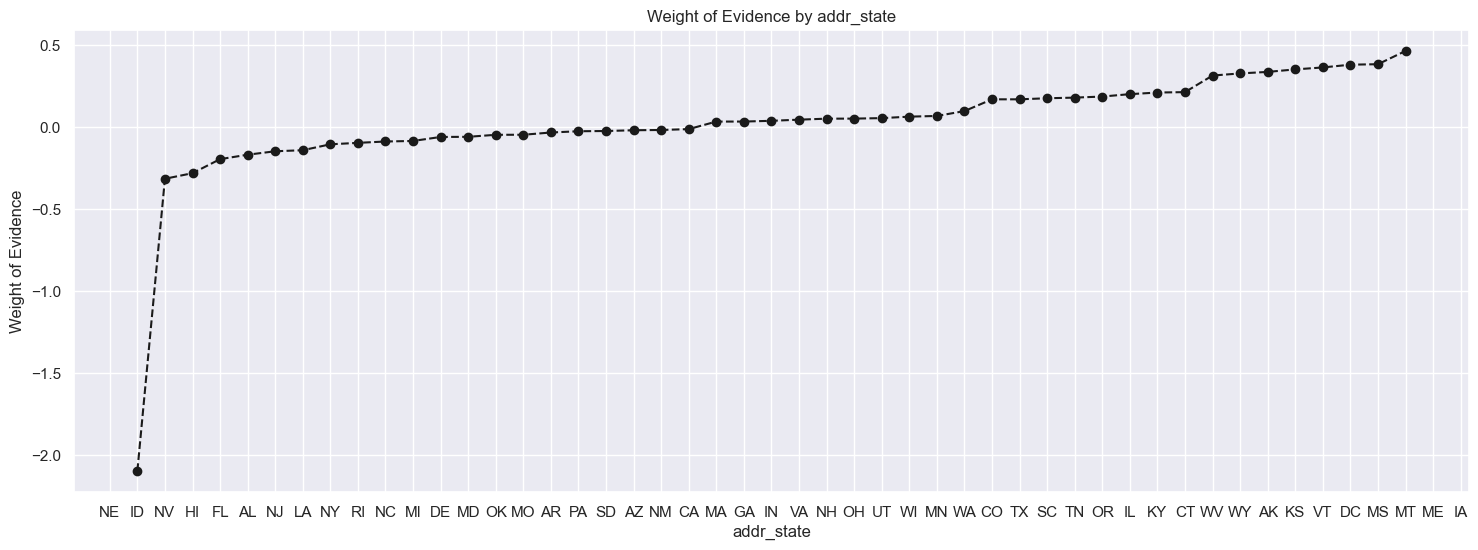

In [44]:
plot_by_woe(df_temp)

No borrowers are currently from North Dakota, but we keep a category for potential future cases. 

In [45]:
# tạo thêm cột dummy cho nd với tất cả giá trị bằng 0
if ['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0    

- There are two states, Nebraska and Iowa, with a considerably lower weight of evidence compared to most states.
- The weight of evidence for the last state (Maine and Idaho) could not be calculated because there are no bad borrowers. It is highly likely that the low number of observations is the reason for their extreme weight of evidence values.

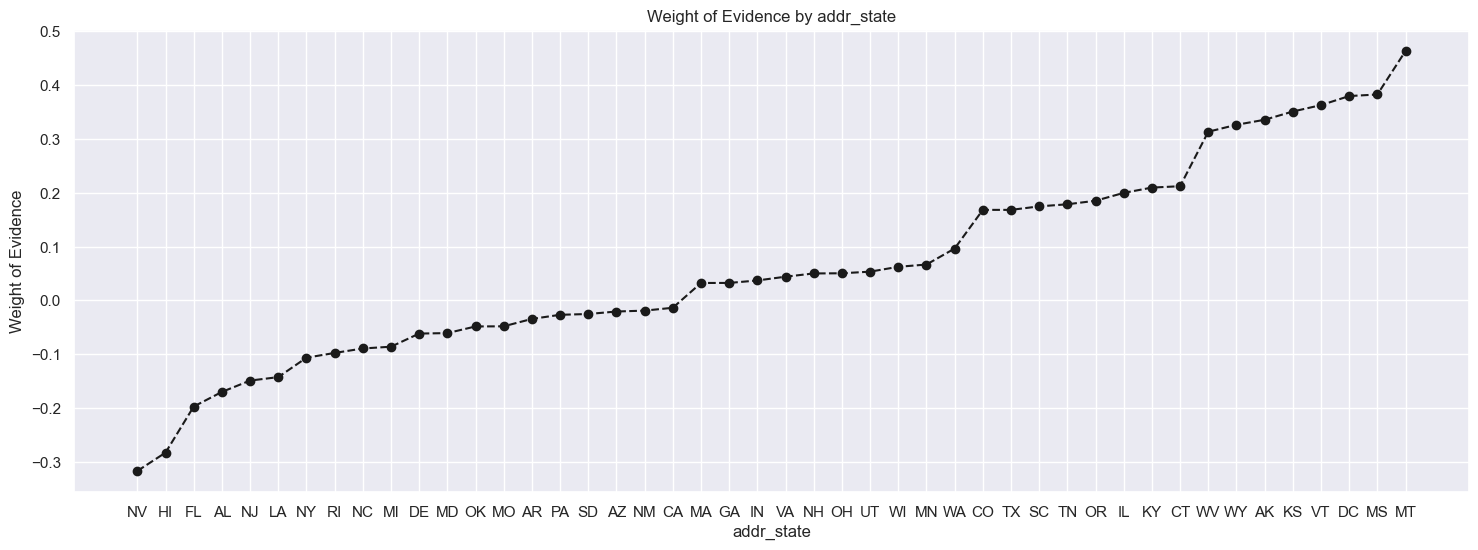

In [46]:
plot_by_woe(df_temp.iloc[2: -2, :])

- Keep the Nevada in a separate category and the next three states in another category.
- The last four states displayed on the last chart can be grouped together in one category based on their rather low number of observations. 

In [47]:
plot_by_woe(df_temp.iloc[6: -6, :])

- From New Mexico to California, most states share similar WoE values, but borrower volume matters. California and New York have notably high borrower counts, so each should have its own dummy variable, while the remaining states can be grouped together or split into a few categories as needed.
- All the states from Utah to New Jersey have similar weights of evidence. Therefore, it's suitable to represent them with one dummy variable.
- The states from Arkansas to Minnesota have similar weights of evidence and are not particularly big on borrowers.
- Do the same for the five states from Rhode Island to Indiana and then the same for the three states from Georgia to Oregon.
- The following states, Wisconsin, WI and Montana MT are a bit apart in weight of evidence, but have a rather low number of observations so we can put them in one group.
- There are Texas, Illinois and Connecticut, which all have similar weight of evidence values. Texas alone has a very high number of observations. Therefore, we are compelled to leave Texas in a separate category and the two following states, Illinois and Connecticut, together in another category.
- Weight of evidence for states from Kansas to Mississippi is higher than Connecticut, but due to few observations, it’s less reliable. We’ll group these states into one dummy variable, as they still indicate better borrower.
- Ưe already have dummy variables for all single states. So for the categories with only one state, we can use these dummy variables and we don't have to create new ones for the categories.

In [48]:
df_inputs_prepr['addr_state:ND_NE_IA'] = sum([df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],
                                                         df_inputs_prepr['addr_state:IA']])

df_inputs_prepr['addr_state:NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:NV'],df_inputs_prepr['addr_state:FL'], 
                                                        df_inputs_prepr['addr_state:HI'],
                                                         df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],
                                              df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
                                              df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']])

df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
                                              df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']])

df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
                                              df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
                                              df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
                                              df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
                                              df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']])
df_inputs_prepr['addr_state:TX'] = sum([df_inputs_prepr['addr_state:TX']])
df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
                                              df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
                                              df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']])

df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
                                              df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
                                              df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']])

- North Dakota to Alabama are reference categories.

#### 6.1.4. verification_status

In [49]:
df_temp = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
df_temp

verification_status  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0            Verified  33641   0.872031    0.360734  29336.0  4305.0   
1     Source Verified  29963   0.895738    0.321295  26839.0  3124.0   
2        Not Verified  29653   0.906890    0.317971  26892.0  2761.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.353161    0.422473 -0.179202             NaN       NaN  0.022684  
1     0.323101    0.306575  0.052501        0.030060  0.231704  0.022684  
2     0.323739    0.270952  0.177995        0.000638  0.125494  0.022684

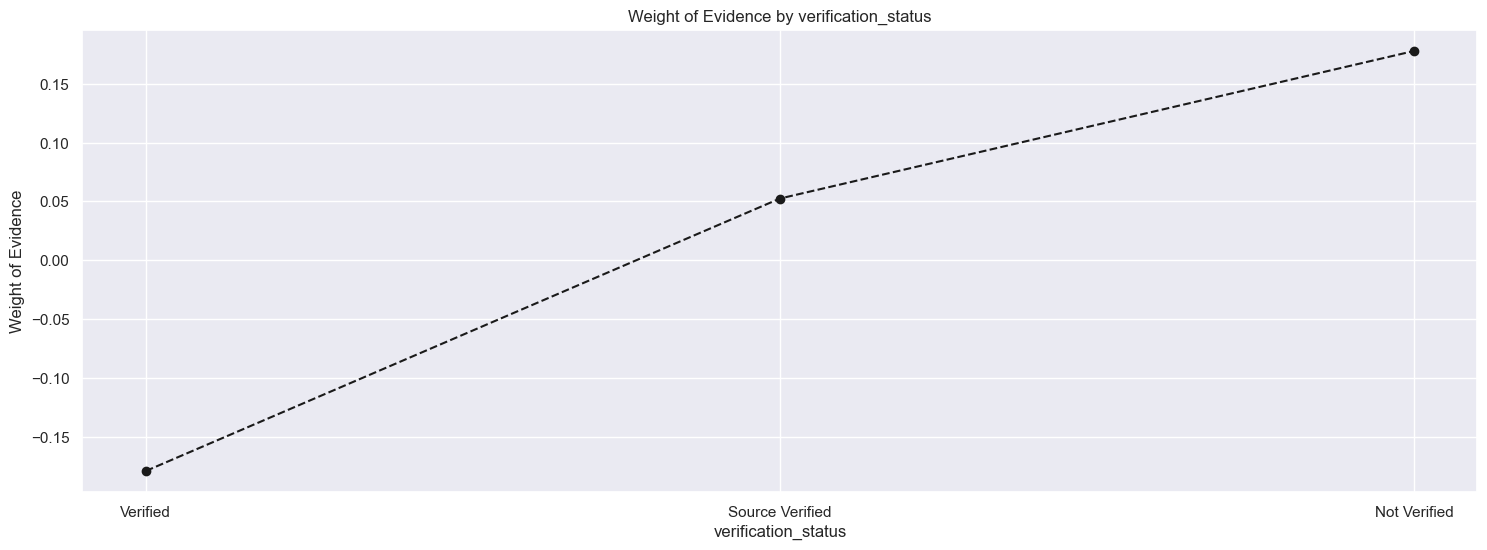

In [50]:
plot_by_woe(df_temp)

#### 6.1.5. purpose

In [51]:
df_temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
df_temp

purpose  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0          educational     89   0.752809    0.000954     67.0    22.0   
1     renewable_energy     70   0.771429    0.000751     54.0    16.0   
2       small_business   1431   0.777079    0.015345   1112.0   319.0   
3              medical    918   0.857298    0.009844    787.0   131.0   
4                house    439   0.858770    0.004707    377.0    62.0   
5                other   4806   0.861007    0.051535   4138.0   668.0   
6              wedding    456   0.864035    0.004890    394.0    62.0   
7               moving    602   0.878738    0.006455    529.0    73.0   
8             vacation    496   0.881048    0.005319    437.0    59.0   
9   debt_consolidation  55012   0.885916    0.589897  48736.0  6276.0   
10      major_purchase   1991   0.900552    0.021350   1793.0   198.0   
11    home_improvement   5299   0.906397    0.056821   4803.0   496.0   
12                 car   1072   0.916045    0.011495    982.0    90.0   
13         credit_card  20576   0.916505    0.220638  18858.0  1718.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.000807    0.002159 -0.984590             NaN       NaN  0.045124  
1      0.000650    0.001570 -0.881845        0.000157  0.102745  0.045124  
2      0.013387    0.031305 -0.849516        0.012737  0.032329  0.045124  
3      0.009474    0.012856 -0.305210        0.003913  0.544307  0.045124  
4      0.004539    0.006084 -0.293130        0.004936  0.012080  0.045124  
5      0.049815    0.065554 -0.274561        0.045277  0.018569  0.045124  
6      0.004743    0.006084 -0.249024        0.045072  0.025537  0.045124  
7      0.006368    0.007164 -0.117712        0.001625  0.131312  0.045124  
8      0.005261    0.005790 -0.095845        0.001108  0.021867  0.045124  
9      0.586707    0.615898 -0.048556        0.581446  0.047289  0.045124  
10     0.021585    0.019431  0.105138        0.565122  0.153693  0.045124  
11     0.057821    0.048675  0.172179        0.036236  0.067042  0.045124  
12     0.011822    0.008832  0.291541        0.045999  0.119362  0.045124  
13     0.227022    0.168597  0.297536        0.215200  0.005995  0.045124

In [52]:
plot_by_woe(df_temp)

In [53]:
df_inputs_prepr['purpose:educ__sm_b_mov'] = sum([df_inputs_prepr['purpose:educational'], df_inputs_prepr['purpose:small_business'], df_inputs_prepr['purpose:moving']])
df_inputs_prepr['purpose:oth__h__med__r_en'] = sum([df_inputs_prepr['purpose:other'], df_inputs_prepr['purpose:house'], df_inputs_prepr['purpose:medical'], df_inputs_prepr['purpose:renewable_energy']])
df_inputs_prepr['purpose:va__wed__debt_cons'] = sum([df_inputs_prepr['purpose:vacation'], df_inputs_prepr['purpose:wedding'], df_inputs_prepr['purpose:debt_consolidation']])
df_inputs_prepr['purpose:home_impr__maj_pur__car__cre_c'] = sum([df_inputs_prepr['purpose:home_improvement'], df_inputs_prepr['purpose:major_purchase'], df_inputs_prepr['purpose:car'], df_inputs_prepr['purpose:credit_card']])

#### 6.1.6. initial_list_status

In [54]:
df_temp = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_temp

initial_list_status  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0                   f  60491   0.879685    0.648648  53213.0  7278.0   
1                   w  32766   0.911127    0.351352  29854.0  2912.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.640603     0.71423 -0.108794             NaN       NaN  0.024888  
1     0.359397     0.28577  0.229238        0.281207  0.338032  0.024888

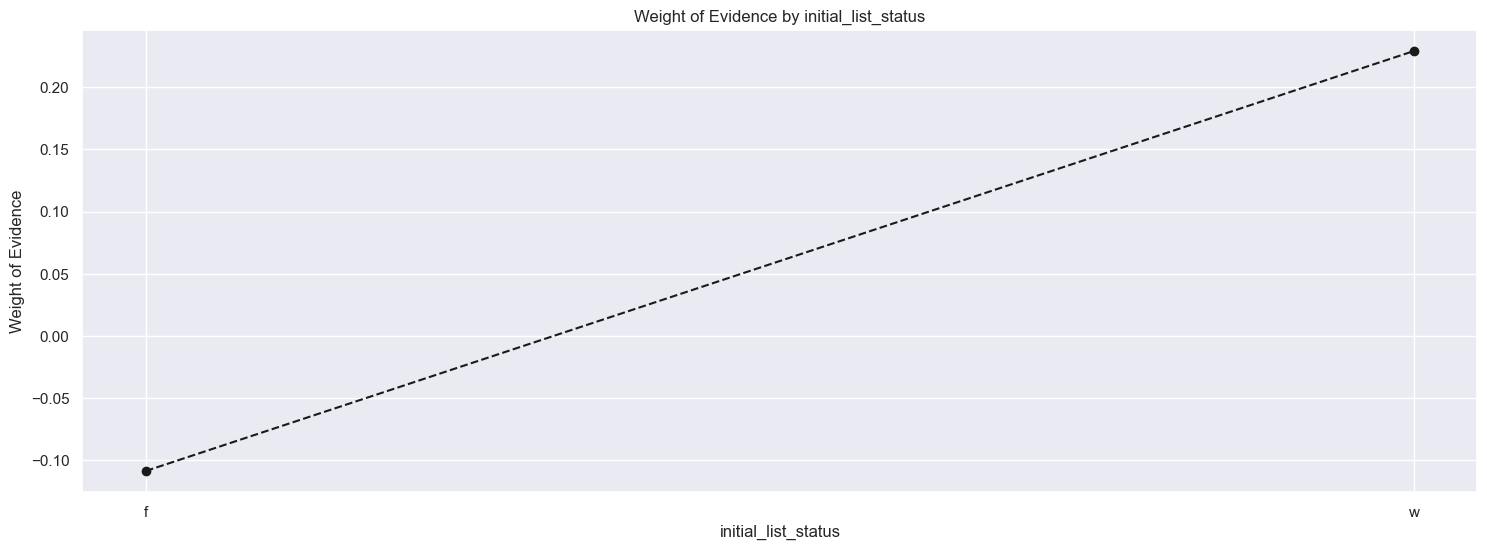

In [55]:
plot_by_woe(df_temp)

### 6.2. Continuous variables 

fine classing -> WoE calculation -> coarse classing -> dummy encoding

#### 6.2.1. term_int

In [56]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'term_int', df_targets_prepr)
df_temp

term_int  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0        36  67534   0.902597    0.724171  60956.0  6578.0     0.733817   
1        60  25723   0.859581    0.275829  22111.0  3612.0     0.266183   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.645535  0.128181             NaN       NaN  0.036603  
1    0.354465 -0.286427        0.467635  0.414608  0.036603

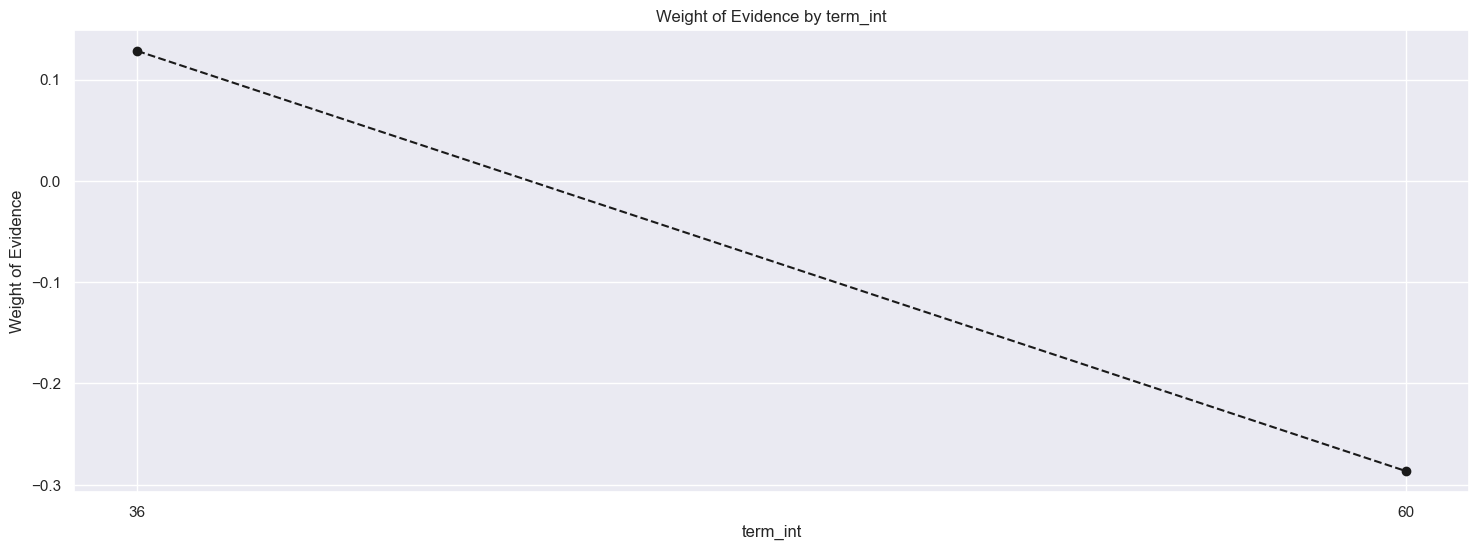

In [57]:
plot_by_woe(df_temp)

In [58]:
df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int'] == 36), 1, 0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int'] == 60), 1, 0)

#### 6.2.2. emp_length

In [59]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'emp_length', df_targets_prepr)
df_temp

emp_length  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0            0  11553   0.874491    0.123883  10103.0  1450.0     0.121625   
1            1   5968   0.892594    0.063995   5327.0   641.0     0.064129   
2            2   8295   0.887402    0.088948   7361.0   934.0     0.088615   
3            3   7391   0.889325    0.079254   6573.0   818.0     0.079129   
4            4   5555   0.889469    0.059567   4941.0   614.0     0.059482   
5            5   6172   0.886261    0.066183   5470.0   702.0     0.065850   
6            6   5225   0.878852    0.056028   4592.0   633.0     0.055281   
7            7   5131   0.893588    0.055020   4585.0   546.0     0.055196   
8            8   4542   0.890137    0.048704   4043.0   499.0     0.048672   
9            9   3621   0.892847    0.038828   3233.0   388.0     0.038920   
10          10  29804   0.900517    0.319590  26839.0  2965.0     0.323101   

    prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.142296 -0.156972             NaN       NaN  0.007766  
1     0.062905  0.019273        0.057496  0.176245  0.007766  
2     0.091658 -0.033766        0.024486  0.053039  0.007766  
3     0.080275 -0.014377        0.009486  0.019389  0.007766  
4     0.060255 -0.012913        0.019647  0.001465  0.007766  
5     0.068891 -0.045140        0.006368  0.032228  0.007766  
6     0.062120 -0.116640        0.010570  0.071500  0.007766  
7     0.053582  0.029686        0.000084  0.146326  0.007766  
8     0.048970 -0.006104        0.006525  0.035790  0.007766  
9     0.038077  0.021920        0.009751  0.028024  0.007766  
10    0.290972  0.104738        0.284180  0.082819  0.007766

In [60]:
plot_by_woe(df_temp)

In [61]:
df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length'].isin([0]), 1, 0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length'].isin([1]), 1, 0)
df_inputs_prepr['emp_length:2-4'] = np.where(df_inputs_prepr['emp_length'].isin([2, 5]), 1, 0)
df_inputs_prepr['emp_length:5-6'] = np.where(df_inputs_prepr['emp_length'].isin([5, 6]), 1, 0)
df_inputs_prepr['emp_length:7-9'] = np.where(df_inputs_prepr['emp_length'].isin([7, 10]), 1, 0)
df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length'].isin([10]), 1, 0)

#### 6.2.3. mths_since_issue_d

In [62]:
#fine class
df_inputs_prepr['mths_since_issue_d_factor'] = pd.cut(df_inputs_prepr['mths_since_issue_d'], 50)

In [63]:
df_inputs_prepr['mths_since_issue_d_factor']

362514      (39.6, 41.4]
288564      (37.8, 39.6]
213591      (64.8, 66.6]
263083     (35.91, 37.8]
165001      (57.6, 59.4]
82511       (48.6, 50.4]
24671       (84.6, 86.4]
97373       (50.4, 52.2]
44058       (46.8, 48.6]
351326      (39.6, 41.4]
176798      (57.6, 59.4]
2253        (70.2, 72.0]
11493       (75.6, 77.4]
247866     (35.91, 37.8]
465694      (46.8, 48.6]
440413      (45.0, 46.8]
340144      (39.6, 41.4]
145732      (55.8, 57.6]
171649      (57.6, 59.4]
135808      (54.0, 55.8]
42139     (118.8, 120.6]
196634      (61.2, 63.0]
41142     (100.8, 102.6]
310417      (37.8, 39.6]
274665      (37.8, 39.6]
269466      (37.8, 39.6]
1554        (70.2, 72.0]
455384      (46.8, 48.6]
121647      (52.2, 54.0]
261521     (35.91, 37.8]
259632     (35.91, 37.8]
115179      (52.2, 54.0]
93531       (50.4, 52.2]
93946       (50.4, 52.2]
278174      (37.8, 39.6]
314251      (37.8, 39.6]
317118      (39.6, 41.4]
106698      (50.4, 52.2]
390216      (41.4, 43.2]
396449      (41.4, 43.2]


In [64]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_issue_d_factor', df_targets_prepr)
df_temp

mths_since_issue_d_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0              (35.91, 37.8]   7191   0.945766    0.077109  6801.0  390.0   
1               (37.8, 39.6]   9752   0.930373    0.104571  9073.0  679.0   
2               (39.6, 41.4]   9506   0.919945    0.101933  8745.0  761.0   
3               (41.4, 43.2]   7240   0.909116    0.077635  6582.0  658.0   
4               (43.2, 45.0]   7217   0.902868    0.077388  6516.0  701.0   
5               (45.0, 46.8]   3104   0.895296    0.033284  2779.0  325.0   
6               (46.8, 48.6]   6197   0.890269    0.066451  5517.0  680.0   
7               (48.6, 50.4]   5821   0.885930    0.062419  5157.0  664.0   
8               (50.4, 52.2]   5021   0.878909    0.053840  4413.0  608.0   
9               (52.2, 54.0]   4497   0.874138    0.048222  3931.0  566.0   
10              (54.0, 55.8]   2064   0.866279    0.022132  1788.0  276.0   
11              (55.8, 57.6]   3572   0.861422    0.038303  3077.0  495.0   
12              (57.6, 59.4]   2904   0.850895    0.031140  2471.0  433.0   
13              (59.4, 61.2]   2474   0.847615    0.026529  2097.0  377.0   
14              (61.2, 63.0]   2539   0.851910    0.027226  2163.0  376.0   
15              (63.0, 64.8]   1115   0.837668    0.011956   934.0  181.0   
16              (64.8, 66.6]   1721   0.816967    0.018454  1406.0  315.0   
17              (66.6, 68.4]   1296   0.852623    0.013897  1105.0  191.0   
18              (68.4, 70.2]   1097   0.839562    0.011763   921.0  176.0   
19              (70.2, 72.0]   1001   0.816184    0.010734   817.0  184.0   
20              (72.0, 73.8]    447   0.829978    0.004793   371.0   76.0   
21              (73.8, 75.6]    790   0.853165    0.008471   674.0  116.0   
22              (75.6, 77.4]    754   0.867374    0.008085   654.0  100.0   
23              (77.4, 79.2]    690   0.844928    0.007399   583.0  107.0   
24              (79.2, 81.0]    599   0.876461    0.006423   525.0   74.0   
25              (81.0, 82.8]    254   0.870079    0.002724   221.0   33.0   
26              (82.8, 84.6]    533   0.878049    0.005715   468.0   65.0   
27              (84.6, 86.4]    459   0.836601    0.004922   384.0   75.0   
28              (86.4, 88.2]    443   0.864560    0.004750   383.0   60.0   
29              (88.2, 90.0]    439   0.863326    0.004707   379.0   60.0   
30              (90.0, 91.8]    194   0.835052    0.002080   162.0   32.0   
31              (91.8, 93.6]    367   0.896458    0.003935   329.0   38.0   
32              (93.6, 95.4]    257   0.879377    0.002756   226.0   31.0   
33              (95.4, 97.2]    276   0.836957    0.002960   231.0   45.0   
34              (97.2, 99.0]    234   0.829060    0.002509   194.0   40.0   
35             (99.0, 100.8]    100   0.920000    0.001072    92.0    8.0   
36            (100.8, 102.6]    170   0.835294    0.001823   142.0   28.0   
37            (102.6, 104.4]    150   0.873333    0.001608   131.0   19.0   
38            (104.4, 106.2]    129   0.868217    0.001383   112.0   17.0   
39            (106.2, 108.0]    119   0.815126    0.001276    97.0   22.0   
40            (108.0, 109.8]     36   0.861111    0.000386    31.0    5.0   
41            (109.8, 111.6]     40   0.800000    0.000429    32.0    8.0   
42            (111.6, 113.4]     37   0.972973    0.000397    36.0    1.0   
43            (113.4, 115.2]     57   0.824561    0.000611    47.0   10.0   
44            (115.2, 117.0]    131   0.801527    0.001405   105.0   26.0   
45            (117.0, 118.8]     59   0.813559    0.000633    48.0   11.0   
46            (118.8, 120.6]     83   0.734940    0.000890    61.0   22.0   
47            (120.6, 122.4]     41   0.609756    0.000440    25.0   16.0   
48            (122.4, 124.2]     23   0.695652    0.000247    16.0    7.0   
49            (124.2, 126.0]     17   0.882353    0.000182    15.0    2.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  

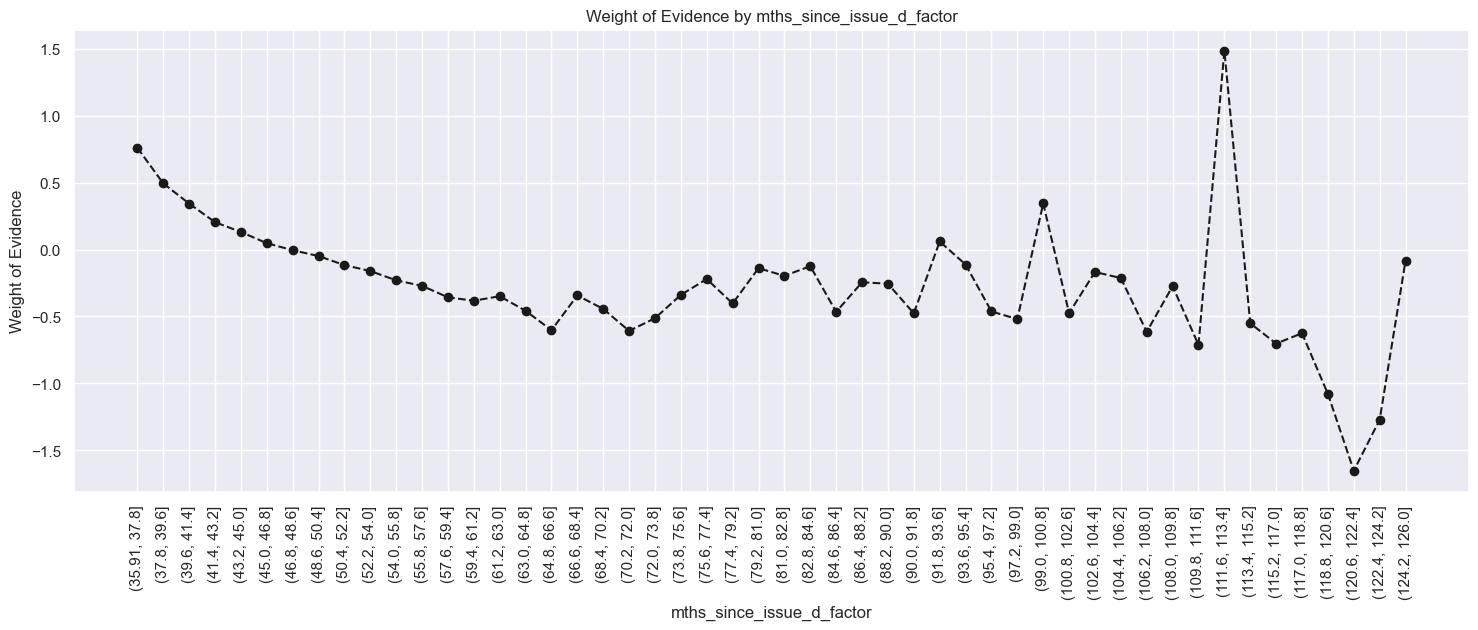

In [65]:
plot_by_woe(df_temp, 90)

In [66]:
plot_by_woe(df_temp.iloc[3: , :], 90)

In [67]:
df_inputs_prepr['mths_since_issue_d:<38'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38)), 1, 0)
df_inputs_prepr['mths_since_issue_d:38-39'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38, 40)), 1, 0)
df_inputs_prepr['mths_since_issue_d:40-41'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(40, 42)), 1, 0)
df_inputs_prepr['mths_since_issue_d:42-48'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(42, 49)), 1, 0)
df_inputs_prepr['mths_since_issue_d:49-52'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(49, 53)), 1, 0)
df_inputs_prepr['mths_since_issue_d:53-64'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(53, 65)), 1, 0)
df_inputs_prepr['mths_since_issue_d:65-84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(65, 85)), 1, 0)
df_inputs_prepr['mths_since_issue_d:>84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(85, int(df_inputs_prepr['mths_since_issue_d'].max()))), 1, 0)

#### 6.2.4. int_rate

In [68]:
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)

In [69]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
df_temp

int_rate_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0     (5.399, 5.833]    198   0.969697    0.002123   192.0    6.0   
1     (5.833, 6.246]   2086   0.979866    0.022368  2044.0   42.0   
2     (6.246, 6.658]   1974   0.972138    0.021167  1919.0   55.0   
3     (6.658, 7.071]    477   0.951782    0.005115   454.0   23.0   
4     (7.071, 7.484]    804   0.981343    0.008621   789.0   15.0   
5     (7.484, 7.897]   3245   0.965485    0.034796  3133.0  112.0   
6      (7.897, 8.31]   2429   0.951009    0.026046  2310.0  119.0   
7      (8.31, 8.722]   1680   0.965476    0.018015  1622.0   58.0   
8     (8.722, 9.135]   2384   0.942114    0.025564  2246.0  138.0   
9     (9.135, 9.548]   1590   0.976730    0.017050  1553.0   37.0   
10    (9.548, 9.961]   1881   0.931419    0.020170  1752.0  129.0   
11   (9.961, 10.374]   2766   0.936370    0.029660  2590.0  176.0   
12  (10.374, 10.786]   1390   0.917986    0.014905  1276.0  114.0   
13  (10.786, 11.199]   4464   0.937500    0.047868  4185.0  279.0   
14  (11.199, 11.612]   1213   0.916735    0.013007  1112.0  101.0   
15  (11.612, 12.025]   3737   0.931496    0.040072  3481.0  256.0   
16  (12.025, 12.438]   3077   0.905752    0.032995  2787.0  290.0   
17   (12.438, 12.85]   2754   0.920116    0.029531  2534.0  220.0   
18   (12.85, 13.263]   5440   0.904044    0.058333  4918.0  522.0   
19  (13.263, 13.676]   3806   0.897793    0.040812  3417.0  389.0   
20  (13.676, 14.089]   2692   0.894874    0.028866  2409.0  283.0   
21  (14.089, 14.502]   5760   0.887153    0.061765  5110.0  650.0   
22  (14.502, 14.914]   1187   0.867734    0.012728  1030.0  157.0   
23  (14.914, 15.327]   4811   0.882145    0.051589  4244.0  567.0   
24   (15.327, 15.74]   3146   0.886840    0.033735  2790.0  356.0   
25   (15.74, 16.153]   1869   0.837346    0.020041  1565.0  304.0   
26  (16.153, 16.566]   3230   0.849226    0.034635  2743.0  487.0   
27  (16.566, 16.978]   1035   0.852174    0.011098   882.0  153.0   
28  (16.978, 17.391]   2843   0.848048    0.030486  2411.0  432.0   
29  (17.391, 17.804]   2992   0.837567    0.032083  2506.0  486.0   
30  (17.804, 18.217]    286   0.835664    0.003067   239.0   47.0   
31   (18.217, 18.63]   2729   0.827409    0.029263  2258.0  471.0   
32   (18.63, 19.042]   1835   0.820163    0.019677  1505.0  330.0   
33  (19.042, 19.455]   1135   0.786784    0.012171   893.0  242.0   
34  (19.455, 19.868]   1680   0.816667    0.018015  1372.0  308.0   
35  (19.868, 20.281]   1244   0.849678    0.013339  1057.0  187.0   
36  (20.281, 20.694]    805   0.814907    0.008632   656.0  149.0   
37  (20.694, 21.106]    956   0.791841    0.010251   757.0  199.0   
38  (21.106, 21.519]    701   0.757489    0.007517   531.0  170.0   
39  (21.519, 21.932]    222   0.801802    0.002381   178.0   44.0   
40  (21.932, 22.345]    832   0.775240    0.008922   645.0  187.0   
41  (22.345, 22.758]    586   0.737201    0.006284   432.0  154.0   
42   (22.758, 23.17]    375   0.741333    0.004021   278.0   97.0   
43   (23.17, 23.583]    655   0.778626    0.007024   510.0  145.0   
44  (23.583, 23.996]    408   0.750000    0.004375   306.0  102.0   
45  (23.996, 24.409]    393   0.834606    0.004214   328.0   65.0   
46  (24.409, 24.822]    436   0.786697    0.004675   343.0   93.0   
47  (24.822, 25.234]    351   0.792023    0.003764   278.0   73.0   
48  (25.234, 25.647]    194   0.757732    0.002080   147.0   47.0   
49   (25.647, 26.06]    474   0.738397    0.005083   350.0  124.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.002311    0.000589  1.367495             NaN       NaN  0.371465  
1      0.024607    0.004122  1.786754        0.022295  0.419258  0.371465  
2      0.023102    0.005397  1.453986        0.001505  0.332768  0.371465  
3      0.005465    0.002257  0.884362        0.017636  0.569623  0.371465  
4      0.009498    0.001472  1.864475        0.004033  0.980113  0.371465  
5      0.037717    0.010991  

In [70]:
plot_by_woe(df_temp, 90)

In [71]:
df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)

#### 6.2.5. funded_amount

In [72]:
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)

In [73]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)
df_temp

funded_amnt_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0      (465.5, 1190.0]    319   0.880878    0.003421   281.0   38.0   
1     (1190.0, 1880.0]    800   0.896250    0.008578   717.0   83.0   
2     (1880.0, 2570.0]   1513   0.900198    0.016224  1362.0  151.0   
3     (2570.0, 3260.0]   1817   0.893781    0.019484  1624.0  193.0   
4     (3260.0, 3950.0]   1245   0.891566    0.013350  1110.0  135.0   
5     (3950.0, 4640.0]   2298   0.882942    0.024642  2029.0  269.0   
6     (4640.0, 5330.0]   3957   0.898155    0.042431  3554.0  403.0   
7     (5330.0, 6020.0]   4186   0.906593    0.044887  3795.0  391.0   
8     (6020.0, 6710.0]   1718   0.881839    0.018422  1515.0  203.0   
9     (6710.0, 7400.0]   2880   0.893403    0.030882  2573.0  307.0   
10    (7400.0, 8090.0]   4266   0.895218    0.045745  3819.0  447.0   
11    (8090.0, 8780.0]   1617   0.890538    0.017339  1440.0  177.0   
12    (8780.0, 9470.0]   2320   0.888793    0.024877  2062.0  258.0   
13   (9470.0, 10160.0]   8552   0.891955    0.091704  7628.0  924.0   
14  (10160.0, 10850.0]   1642   0.872716    0.017607  1433.0  209.0   
15  (10850.0, 11540.0]   2091   0.880918    0.022422  1842.0  249.0   
16  (11540.0, 12230.0]   5767   0.906190    0.061840  5226.0  541.0   
17  (12230.0, 12920.0]   1228   0.875407    0.013168  1075.0  153.0   
18  (12920.0, 13610.0]   1860   0.898925    0.019945  1672.0  188.0   
19  (13610.0, 14300.0]   2087   0.899377    0.022379  1877.0  210.0   
20  (14300.0, 14990.0]   1255   0.886853    0.013457  1113.0  142.0   
21  (14990.0, 15680.0]   5441   0.903143    0.058344  4914.0  527.0   
22  (15680.0, 16370.0]   2920   0.882534    0.031311  2577.0  343.0   
23  (16370.0, 17060.0]   1625   0.880000    0.017425  1430.0  195.0   
24  (17060.0, 17750.0]    921   0.850163    0.009876   783.0  138.0   
25  (17750.0, 18440.0]   2898   0.885783    0.031075  2567.0  331.0   
26  (18440.0, 19130.0]    989   0.858443    0.010605   849.0  140.0   
27  (19130.0, 19820.0]   1057   0.875118    0.011334   925.0  132.0   
28  (19820.0, 20510.0]   5055   0.896736    0.054205  4533.0  522.0   
29  (20510.0, 21200.0]   1635   0.895413    0.017532  1464.0  171.0   
30  (21200.0, 21890.0]    476   0.834034    0.005104   397.0   79.0   
31  (21890.0, 22580.0]   1028   0.883268    0.011023   908.0  120.0   
32  (22580.0, 23270.0]    633   0.892575    0.006788   565.0   68.0   
33  (23270.0, 23960.0]    497   0.837022    0.005329   416.0   81.0   
34  (23960.0, 24650.0]   2491   0.898033    0.026711  2237.0  254.0   
35  (24650.0, 25340.0]   2500   0.903200    0.026808  2258.0  242.0   
36  (25340.0, 26030.0]    487   0.852156    0.005222   415.0   72.0   
37  (26030.0, 26720.0]    299   0.822742    0.003206   246.0   53.0   
38  (26720.0, 27410.0]    410   0.870732    0.004396   357.0   53.0   
39  (27410.0, 28100.0]   1604   0.895885    0.017200  1437.0  167.0   
40  (28100.0, 28790.0]    204   0.857843    0.002188   175.0   29.0   
41  (28790.0, 29480.0]    286   0.846154    0.003067   242.0   44.0   
42  (29480.0, 30170.0]   1762   0.879682    0.018894  1550.0  212.0   
43  (30170.0, 30860.0]    133   0.827068    0.001426   110.0   23.0   
44  (30860.0, 31550.0]    218   0.830275    0.002338   181.0   37.0   
45  (31550.0, 32240.0]    367   0.920981    0.003935   338.0   29.0   
46  (32240.0, 32930.0]    139   0.884892    0.001491   123.0   16.0   
47  (32930.0, 33620.0]    275   0.901818    0.002949   248.0   27.0   
48  (33620.0, 34310.0]    142   0.894366    0.001523   127.0   15.0   
49  (34310.0, 35000.0]   3347   0.880789    0.035890  2948.0  399.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.003383    0.003729 -0.097472             NaN       NaN  0.018663  
1      0.008632    0.008145  0.057995        0.005249  0.155467  0.018663  
2      0.016396    0.014818  0.101189        0.007765  0.043194  0.018663  
3      0.019550    0.018940  0.031717        0.003154  0.069472  0.018663  
4 

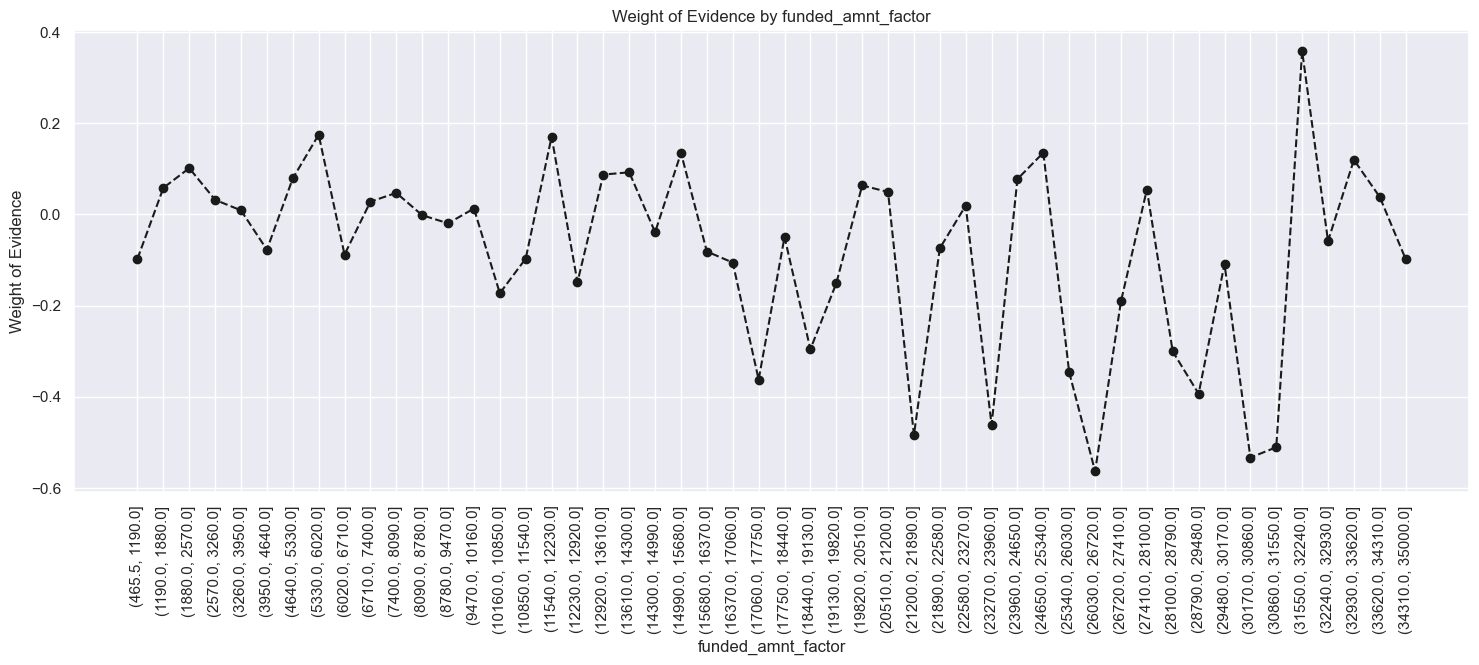

In [74]:
plot_by_woe(df_temp, 90)

- The chart shows the consecutive intervals of the variable have very different weights of evidence.
- It seems that all of these variations are around a trend that is almost horizontal. There is no other clear pattern of dependence between the independent variable and weight of evidence. In other words, weight of evidence varies greatly, and there seems to be no association whatsoever with the independent variable.

=> This is sufficient reason to make the decision not to use the funded amount variable in our PD model, so there will be no need for us to create dummy variables.

#### 6.2.6. mths_since_earliest_cr_line

In [75]:
df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'], 20)

In [76]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_earliest_cr_line_factor', df_targets_prepr)
df_temp

mths_since_earliest_cr_line_factor  n_obs  prop_good  prop_n_obs   n_good  \
0                      (-0.804, 40.2]      5   1.000000    0.000054      5.0   
1                        (40.2, 80.4]    122   0.909836    0.001308    111.0   
2                       (80.4, 120.6]   2991   0.869943    0.032073   2602.0   
3                      (120.6, 160.8]  10764   0.876812    0.115423   9438.0   
4                      (160.8, 201.0]  18826   0.886327    0.201872  16686.0   
5                      (201.0, 241.2]  21273   0.886194    0.228112  18852.0   
6                      (241.2, 281.4]  14779   0.891806    0.158476  13180.0   
7                      (281.4, 321.6]   8986   0.902070    0.096357   8106.0   
8                      (321.6, 361.8]   6430   0.904044    0.068949   5813.0   
9                      (361.8, 402.0]   4065   0.909717    0.043589   3698.0   
10                     (402.0, 442.2]   2191   0.912825    0.023494   2000.0   
11                     (442.2, 482.4]   1232   0.921266    0.013211   1135.0   
12                     (482.4, 522.6]    753   0.916335    0.008074    690.0   
13                     (522.6, 562.8]    440   0.920455    0.004718    405.0   
14                     (562.8, 603.0]    228   0.846491    0.002445    193.0   
15                     (603.0, 643.2]    112   0.883929    0.001201     99.0   
16                     (643.2, 683.4]     37   0.918919    0.000397     34.0   
17                     (683.4, 723.6]     19   0.842105    0.000204     16.0   
18                     (723.6, 763.8]      3   1.000000    0.000032      3.0   
19                     (763.8, 804.0]      1   1.000000    0.000011      1.0   

     n_bad  prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.0     0.000060    0.000000       inf             NaN       NaN  inf  
1     11.0     0.001336    0.001079  0.213394        0.001276       inf  inf  
2    389.0     0.031324    0.038175 -0.197784        0.029988  0.411179  inf  
3   1326.0     0.113619    0.130128 -0.135663        0.082295  0.062121  inf  
4   2140.0     0.200874    0.210010 -0.044476        0.087255  0.091187  inf  
5   2421.0     0.226949    0.237586 -0.045802        0.026075  0.001326  inf  
6   1599.0     0.158667    0.156919  0.011081        0.068282  0.056884  inf  
7    880.0     0.097584    0.086359  0.122197        0.061083  0.111116  inf  
8    617.0     0.069980    0.060550  0.144742        0.027604  0.022545  inf  
9    367.0     0.044518    0.036016  0.211945        0.025461  0.067203  inf  
10   191.0     0.024077    0.018744  0.250388        0.020441  0.038443  inf  
11    97.0     0.013664    0.009519  0.361436        0.010413  0.111048  inf  
12    63.0     0.008307    0.006183  0.295316        0.005357  0.066120  inf  
13    35.0     0.004876    0.003435  0.350298        0.003431  0.054982  inf  
14    35.0     0.002323    0.003435 -0.390899        0.002552  0.741197  inf  
15    13.0     0.001192    0.001276 -0.068070        0.001132  0.322828  inf  
16     3.0     0.000409    0.000294  0.329508        0.000783  0.397578  inf  
17     3.0     0.000193    0.000294 -0.424264        0.000217  0.753772  inf  
18     0.0     0.000036    0.000000       inf        0.000157       inf  inf  
19     0.0     0.000012    0.000000       inf        0.000024       NaN  inf

In [77]:
plot_by_woe(df_temp, 90)

In [78]:
df_inputs_prepr['mths_since_earliest_cr_line:<133.05'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin([-0.887, 133.05]), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:133.05- 266.1'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin([133.05,  266.1]), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:266.1-487.85'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin([266.1, 487.85]), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:487.85-665.25'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin([487.85, 665.25]), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:665.25-798.3'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin([665.25, 798.3]), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:>798.3'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin([798.3, 887.0]), 1, 0)

#### 6.2.7.installment

In [79]:
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'], 50)

In [80]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)
df_temp

installment_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0      (14.369, 43.585]    485   0.872165    0.005201   423.0   62.0   
1       (43.585, 71.41]   1246   0.904494    0.013361  1127.0  119.0   
2       (71.41, 99.235]   1731   0.895436    0.018562  1550.0  181.0   
3      (99.235, 127.06]   2292   0.896597    0.024577  2055.0  237.0   
4     (127.06, 154.885]   2602   0.886241    0.027901  2306.0  296.0   
5     (154.885, 182.71]   4133   0.897653    0.044318  3710.0  423.0   
6     (182.71, 210.535]   4109   0.905086    0.044061  3719.0  390.0   
7     (210.535, 238.36]   3730   0.901877    0.039997  3364.0  366.0   
8     (238.36, 266.185]   4660   0.899785    0.049969  4193.0  467.0   
9     (266.185, 294.01]   4975   0.888844    0.053347  4422.0  553.0   
10    (294.01, 321.835]   5186   0.906286    0.055610  4700.0  486.0   
11    (321.835, 349.66]   6432   0.892568    0.068971  5741.0  691.0   
12    (349.66, 377.485]   4758   0.881673    0.051020  4195.0  563.0   
13    (377.485, 405.31]   4352   0.900276    0.046667  3918.0  434.0   
14    (405.31, 433.135]   3429   0.882765    0.036769  3027.0  402.0   
15    (433.135, 460.96]   3225   0.879380    0.034582  2836.0  389.0   
16    (460.96, 488.785]   3865   0.894437    0.041445  3457.0  408.0   
17    (488.785, 516.61]   3861   0.884227    0.041402  3414.0  447.0   
18    (516.61, 544.435]   2730   0.868864    0.029274  2372.0  358.0   
19    (544.435, 572.26]   2564   0.877535    0.027494  2250.0  314.0   
20    (572.26, 600.085]   2434   0.873870    0.026100  2127.0  307.0   
21    (600.085, 627.91]   2294   0.901918    0.024599  2069.0  225.0   
22    (627.91, 655.735]   2091   0.901004    0.022422  1884.0  207.0   
23    (655.735, 683.56]   2295   0.894989    0.024609  2054.0  241.0   
24    (683.56, 711.385]   1650   0.876970    0.017693  1447.0  203.0   
25    (711.385, 739.21]   1252   0.892173    0.013425  1117.0  135.0   
26    (739.21, 767.035]   1360   0.897794    0.014583  1221.0  139.0   
27    (767.035, 794.86]   1160   0.886207    0.012439  1028.0  132.0   
28    (794.86, 822.685]   1023   0.888563    0.010970   909.0  114.0   
29    (822.685, 850.51]    967   0.885212    0.010369   856.0  111.0   
30    (850.51, 878.335]   1046   0.894837    0.011216   936.0  110.0   
31    (878.335, 906.16]    707   0.861386    0.007581   609.0   98.0   
32    (906.16, 933.985]    604   0.855960    0.006477   517.0   87.0   
33    (933.985, 961.81]    635   0.861417    0.006809   547.0   88.0   
34    (961.81, 989.635]    460   0.850000    0.004933   391.0   69.0   
35   (989.635, 1017.46]    441   0.854875    0.004729   377.0   64.0   
36  (1017.46, 1045.285]    305   0.875410    0.003271   267.0   38.0   
37  (1045.285, 1073.11]    206   0.878641    0.002209   181.0   25.0   
38  (1073.11, 1100.935]    228   0.894737    0.002445   204.0   24.0   
39  (1100.935, 1128.76]    247   0.931174    0.002649   230.0   17.0   
40  (1128.76, 1156.585]    227   0.916300    0.002434   208.0   19.0   
41  (1156.585, 1184.41]    287   0.895470    0.003078   257.0   30.0   
42  (1184.41, 1212.235]    308   0.905844    0.003303   279.0   29.0   
43  (1212.235, 1240.06]    284   0.901408    0.003045   256.0   28.0   
44  (1240.06, 1267.885]    159   0.861635    0.001705   137.0   22.0   
45  (1267.885, 1295.71]    132   0.833333    0.001415   110.0   22.0   
46  (1295.71, 1323.535]     47   0.787234    0.000504    37.0   10.0   
47  (1323.535, 1351.36]     21   0.714286    0.000225    15.0    6.0   
48  (1351.36, 1379.185]     15   0.733333    0.000161    11.0    4.0   
49  (1379.185, 1407.01]      7   1.000000    0.000075     7.0    0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.005092    0.006084 -0.178003             NaN       NaN  inf  
1      0.013567    0.011678  0.149950        0.008475  0.327953  inf  
2      0.018660    0.017763  0.049273        0.005092  0.100678  inf  
3      0.024739    0.023258  0.061730        0.0

In [81]:
plot_by_woe(df_temp, 90)

No clear trend, fluctuate

#### 6.2.8. delinq_2yrs

In [82]:
df_inputs_prepr['delinq_2yrs'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  6.,  5.,  7., 16.,  8., 18., 10.,  9.,
       13., 11., 14., 12., 19., 15.])

No need to do fine class

In [83]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'delinq_2yrs', df_targets_prepr)
df_temp

delinq_2yrs  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0           0.0  76566   0.890944    0.821021  68216.0  8350.0     0.821217   
1           1.0  11297   0.890413    0.121138  10059.0  1238.0     0.121095   
2           2.0   3192   0.885025    0.034228   2825.0   367.0     0.034009   
3           3.0   1134   0.893298    0.012160   1013.0   121.0     0.012195   
4           4.0    510   0.886275    0.005469    452.0    58.0     0.005441   
5           5.0    270   0.911111    0.002895    246.0    24.0     0.002961   
6           6.0    128   0.859375    0.001373    110.0    18.0     0.001324   
7           7.0     67   0.925373    0.000718     62.0     5.0     0.000746   
8           8.0     29   0.896552    0.000311     26.0     3.0     0.000313   
9           9.0     22   0.954545    0.000236     21.0     1.0     0.000253   
10         10.0      9   0.888889    0.000097      8.0     1.0     0.000096   
11         11.0     10   1.000000    0.000107     10.0     0.0     0.000120   
12         12.0      8   0.625000    0.000086      5.0     3.0     0.000060   
13         13.0      7   0.857143    0.000075      6.0     1.0     0.000072   
14         14.0      2   1.000000    0.000021      2.0     0.0     0.000024   
15         15.0      1   1.000000    0.000011      1.0     0.0     0.000012   
16         16.0      1   1.000000    0.000011      1.0     0.0     0.000012   
17         18.0      3   1.000000    0.000032      3.0     0.0     0.000036   
18         19.0      1   1.000000    0.000011      1.0     0.0     0.000012   

    prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.819431  0.002177             NaN       NaN  inf  
1     0.121492 -0.003270        0.700122  0.005447  inf  
2     0.036016 -0.057339        0.087086  0.054069  inf  
3     0.011874  0.026640        0.021814  0.083979  inf  
4     0.005692 -0.045001        0.006754  0.071642  inf  
5     0.002355  0.229037        0.002480  0.274039  inf  
6     0.001766 -0.288132        0.001637  0.517169  inf  
7     0.000491  0.419456        0.000578  0.707588  inf  
8     0.000294  0.061244        0.000433  0.358212  inf  
9     0.000098  0.946282        0.000060  0.885038  inf  
10    0.000098 -0.018799        0.000157  0.965081  inf  
11    0.000000       inf        0.000024       inf  inf  
12    0.000294 -1.587415        0.000060       inf  inf  
13    0.000098 -0.306481        0.000012  1.280934  inf  
14    0.000000       inf        0.000048       inf  inf  
15    0.000000       inf        0.000012       NaN  inf  
16    0.000000       inf        0.000000       NaN  inf  
17    0.000000       inf        0.000024       NaN  inf  
18    0.000000       inf        0.000024       NaN  inf

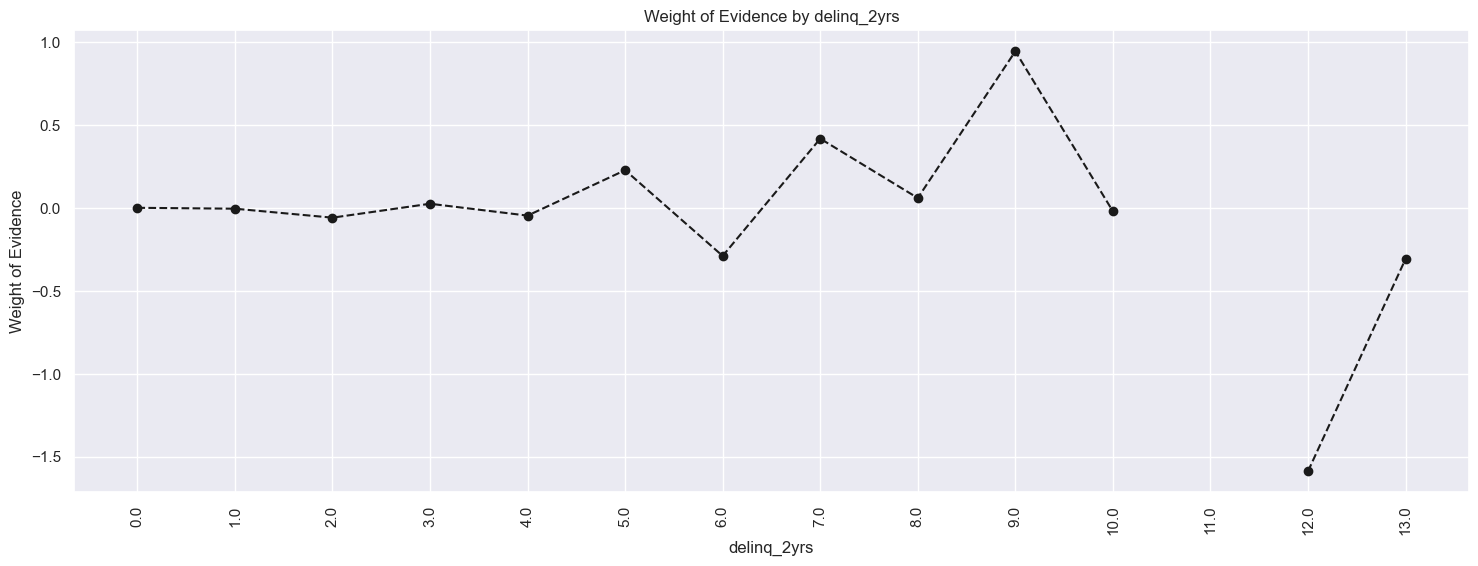

In [84]:
plot_by_woe(df_temp, 90)

In [85]:
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
df_inputs_prepr['delinq_2yrs:1-5'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 5), 1, 0)
df_inputs_prepr['delinq_2yrs:>=6'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 6), 1, 0)

#### 6.2.9. inq_last_6mths

In [86]:
df_inputs_prepr['inq_last_6mths'].unique()

array([ 0.,  1.,  2.,  5.,  4.,  6.,  3.,  7.,  8., 11.,  9., 18., 19.,
       24., 10., 12., 13., 14.])

In [87]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr)
df_temp

inq_last_6mths  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0              0.0  48295   0.910094    0.517870  43953.0  4342.0   
1              1.0  25985   0.882394    0.278639  22929.0  3056.0   
2              2.0  11611   0.861252    0.124505  10000.0  1611.0   
3              3.0   5086   0.846245    0.054537   4304.0   782.0   
4              4.0   1431   0.841370    0.015345   1204.0   227.0   
5              5.0    551   0.842105    0.005908    464.0    87.0   
6              6.0    211   0.763033    0.002263    161.0    50.0   
7              7.0     36   0.527778    0.000386     19.0    17.0   
8              8.0     21   0.523810    0.000225     11.0    10.0   
9              9.0      7   0.428571    0.000075      3.0     4.0   
10            10.0      7   0.857143    0.000075      6.0     1.0   
11            11.0      7   1.000000    0.000075      7.0     0.0   
12            12.0      3   1.000000    0.000032      3.0     0.0   
13            13.0      1   0.000000    0.000011      0.0     1.0   
14            14.0      1   0.000000    0.000011      0.0     1.0   
15            18.0      2   0.500000    0.000021      1.0     1.0   
16            19.0      1   1.000000    0.000011      1.0     0.0   
17            24.0      1   1.000000    0.000011      1.0     0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.529127    0.426104  0.216545             NaN       NaN  inf  
1      0.276030    0.299902 -0.082945        0.253097  0.299490  inf  
2      0.120385    0.158096 -0.272511        0.155645  0.189566  inf  
3      0.051814    0.076742 -0.392795        0.068571  0.120285  inf  
4      0.014494    0.022277 -0.429786        0.037319  0.036991  inf  
5      0.005586    0.008538 -0.424264        0.008908  0.005522  inf  
6      0.001938    0.004907 -0.928859        0.003648  0.504595  inf  
7      0.000229    0.001668 -1.987015        0.001709  1.058156  inf  
8      0.000132    0.000981 -2.002930        0.000096  0.015915  inf  
9      0.000036    0.000393 -2.385923        0.000096  0.382992  inf  
10     0.000072    0.000098 -0.306481        0.000036  2.079442  inf  
11     0.000084    0.000000       inf        0.000012       inf  inf  
12     0.000036    0.000000       inf        0.000048       NaN  inf  
13     0.000000    0.000098      -inf        0.000036       inf  inf  
14     0.000000    0.000098      -inf        0.000000       NaN  inf  
15     0.000012    0.000098 -2.098241        0.000012       inf  inf  
16     0.000012    0.000000       inf        0.000000       inf  inf  
17     0.000012    0.000000       inf        0.000000       NaN  inf

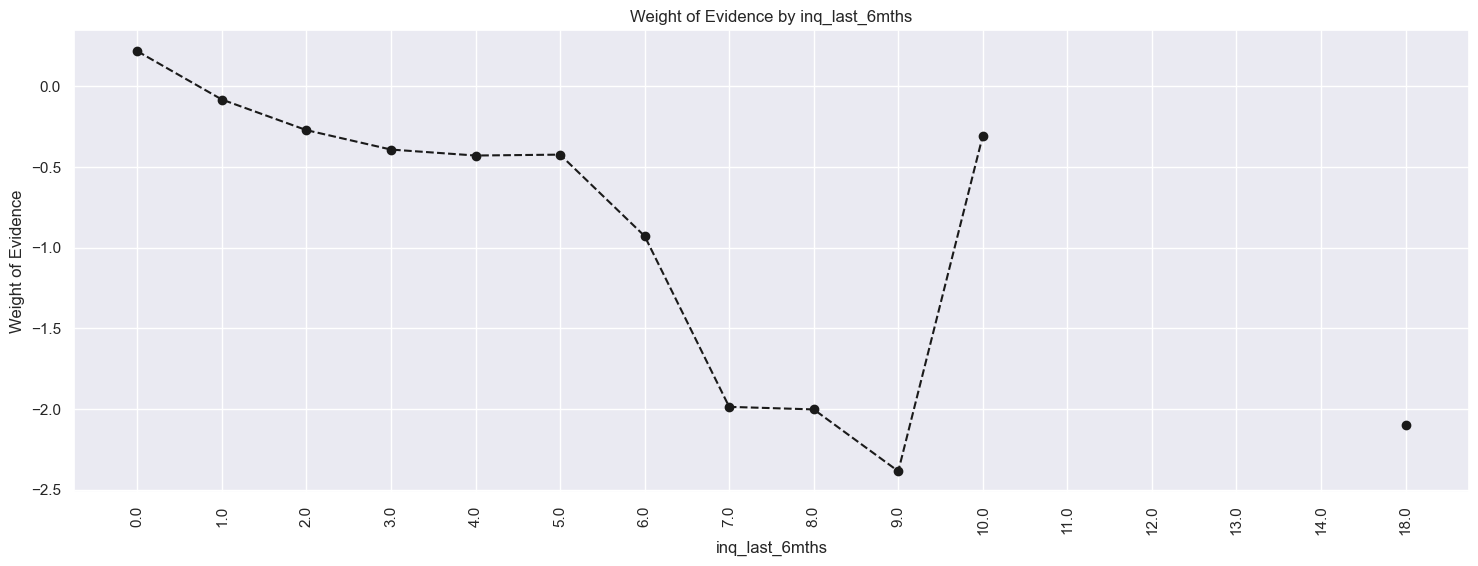

In [88]:
plot_by_woe(df_temp, 90)

In [89]:
df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths:1'] = np.where((df_inputs_prepr['inq_last_6mths'] == 1), 1, 0)
df_inputs_prepr['inq_last_6mths:2-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 2) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prepr['inq_last_6mths:>=7'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 7), 1, 0)

#### 6.2.10. open_acc

In [90]:
df_inputs_prepr['open_acc'].unique()

array([ 7., 18.,  9., 12.,  5., 22.,  3., 17., 16.,  6., 10., 20., 23.,
       13.,  4., 15., 14., 11., 19., 24., 21.,  8., 31., 26.,  1., 32.,
       37., 27., 25.,  2., 28., 29., 30., 39., 34., 33., 35., 36., 40.,
        0., 38., 53., 48., 52., 46., 42., 45., 43., 58., 41., 49., 61.,
       50.])

In [91]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'open_acc', df_targets_prepr)
df_temp

open_acc  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0        0.0      7   1.000000    0.000075     7.0    0.0     0.000084   
1        1.0     32   0.875000    0.000343    28.0    4.0     0.000337   
2        2.0    334   0.838323    0.003582   280.0   54.0     0.003371   
3        3.0   1122   0.852941    0.012031   957.0  165.0     0.011521   
4        4.0   2560   0.892188    0.027451  2284.0  276.0     0.027496   
5        5.0   4403   0.891438    0.047214  3925.0  478.0     0.047251   
6        6.0   6216   0.890766    0.066655  5537.0  679.0     0.066657   
7        7.0   7433   0.886856    0.079704  6592.0  841.0     0.079358   
8        8.0   8314   0.893433    0.089151  7428.0  886.0     0.089422   
9        9.0   8768   0.888230    0.094020  7788.0  980.0     0.093756   
10      10.0   8576   0.889109    0.091961  7625.0  951.0     0.091793   
11      11.0   7740   0.894444    0.082996  6923.0  817.0     0.083342   
12      12.0   6886   0.887017    0.073839  6108.0  778.0     0.073531   
13      13.0   5914   0.893304    0.063416  5283.0  631.0     0.063599   
14      14.0   4960   0.895766    0.053186  4443.0  517.0     0.053487   
15      15.0   4006   0.892162    0.042957  3574.0  432.0     0.043026   
16      16.0   3269   0.898134    0.035054  2936.0  333.0     0.035345   
17      17.0   2680   0.886940    0.028738  2377.0  303.0     0.028615   
18      18.0   2259   0.902169    0.024223  2038.0  221.0     0.024534   
19      19.0   1811   0.893429    0.019419  1618.0  193.0     0.019478   
20      20.0   1444   0.898199    0.015484  1297.0  147.0     0.015614   
21      21.0   1037   0.880424    0.011120   913.0  124.0     0.010991   
22      22.0    784   0.887755    0.008407   696.0   88.0     0.008379   
23      23.0    628   0.904459    0.006734   568.0   60.0     0.006838   
24      24.0    473   0.890063    0.005072   421.0   52.0     0.005068   
25      25.0    391   0.882353    0.004193   345.0   46.0     0.004153   
26      26.0    250   0.884000    0.002681   221.0   29.0     0.002661   
27      27.0    204   0.911765    0.002188   186.0   18.0     0.002239   
28      28.0    153   0.895425    0.001641   137.0   16.0     0.001649   
29      29.0    128   0.843750    0.001373   108.0   20.0     0.001300   
30      30.0    107   0.906542    0.001147    97.0   10.0     0.001168   
31      31.0     73   0.890411    0.000783    65.0    8.0     0.000783   
32      32.0     62   0.951613    0.000665    59.0    3.0     0.000710   
33      33.0     47   0.851064    0.000504    40.0    7.0     0.000482   
34      34.0     40   0.825000    0.000429    33.0    7.0     0.000397   
35      35.0     33   0.939394    0.000354    31.0    2.0     0.000373   
36      36.0     22   0.772727    0.000236    17.0    5.0     0.000205   
37      37.0     21   0.857143    0.000225    18.0    3.0     0.000217   
38      38.0     14   0.928571    0.000150    13.0    1.0     0.000157   
39      39.0     12   0.916667    0.000129    11.0    1.0     0.000132   
40      40.0      9   0.555556    0.000097     5.0    4.0     0.000060   
41      41.0      6   1.000000    0.000064     6.0    0.0     0.000072   
42      42.0      7   1.000000    0.000075     7.0    0.0     0.000084   
43      43.0      4   1.000000    0.000043     4.0    0.0     0.000048   
44      45.0      4   1.000000    0.000043     4.0    0.0     0.000048   
45      46.0      2   1.000000    0.000021     2.0    0.0     0.000024   
46      48.0      2   1.000000    0.000021     2.0    0.0     0.000024   
47      49.0      2   1.000000    0.000021     2.0    0.0     0.000024   
48      50.0      1   1.000000    0.000011     1.0    0.0     0.000012   
49      52.0      1   1.000000    0.000011     1.0    0.0     0.000012   
50      53.0      2   1.000000    0.000021     2.0    0.0     0.000024   
51      58.0      3   1.000000    0.000032     3.0    0.0     0.000036   
52      61.0      1   1.000000    0.000011     1.0    0.0     0.000012   

    pro

In [92]:
plot_by_woe(df_temp, 90)

In [93]:
df_inputs_prepr['open_acc:0-3'] = np.where((df_inputs_prepr['open_acc'] >= 0) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)
df_inputs_prepr['open_acc:4-13'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 13), 1, 0)
df_inputs_prepr['open_acc:13-25'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)
df_inputs_prepr['open_acc:26-33'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 33), 1, 0)
df_inputs_prepr['open_acc:>=33'] = np.where((df_inputs_prepr['open_acc'] >= 34), 1, 0)

#### 6.2.11. pub_rec

In [94]:
df_inputs_prepr['pub_rec'].unique()

array([ 0.,  1.,  2.,  4.,  3.,  5., 12., 49.,  7.,  6.,  8., 14., 11.,
       10.,  9.])

In [95]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'pub_rec', df_targets_prepr)
df_temp

pub_rec  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0       0.0  80923   0.889179    0.867742  71955.0  8968.0     0.866228   
1       1.0  10670   0.901125    0.114415   9615.0  1055.0     0.115750   
2       2.0   1097   0.904284    0.011763    992.0   105.0     0.011942   
3       3.0    331   0.900302    0.003549    298.0    33.0     0.003587   
4       4.0    112   0.857143    0.001201     96.0    16.0     0.001156   
5       5.0     73   0.904110    0.000783     66.0     7.0     0.000795   
6       6.0     19   0.894737    0.000204     17.0     2.0     0.000205   
7       7.0     14   0.785714    0.000150     11.0     3.0     0.000132   
8       8.0      5   0.800000    0.000054      4.0     1.0     0.000048   
9       9.0      2   1.000000    0.000021      2.0     0.0     0.000024   
10     10.0      3   1.000000    0.000032      3.0     0.0     0.000036   
11     11.0      5   1.000000    0.000054      5.0     0.0     0.000060   
12     12.0      1   1.000000    0.000011      1.0     0.0     0.000012   
13     14.0      1   1.000000    0.000011      1.0     0.0     0.000012   
14     49.0      1   1.000000    0.000011      1.0     0.0     0.000012   

    prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.880079 -0.015862             NaN       NaN  inf  
1     0.103533  0.111543        0.750479  0.127405  inf  
2     0.010304  0.147522        0.103808  0.035979  inf  
3     0.003238  0.102345        0.008355  0.045177  inf  
4     0.001570 -0.306481        0.002432  0.408826  inf  
5     0.000687  0.145504        0.000361  0.451985  inf  
6     0.000196  0.041825        0.000590  0.103678  inf  
7     0.000294 -0.798958        0.000072  0.840783  inf  
8     0.000098 -0.711946        0.000084  0.087011  inf  
9     0.000000       inf        0.000024       inf  inf  
10    0.000000       inf        0.000012       NaN  inf  
11    0.000000       inf        0.000024       NaN  inf  
12    0.000000       inf        0.000048       NaN  inf  
13    0.000000       inf        0.000000       NaN  inf  
14    0.000000       inf        0.000000       NaN  inf

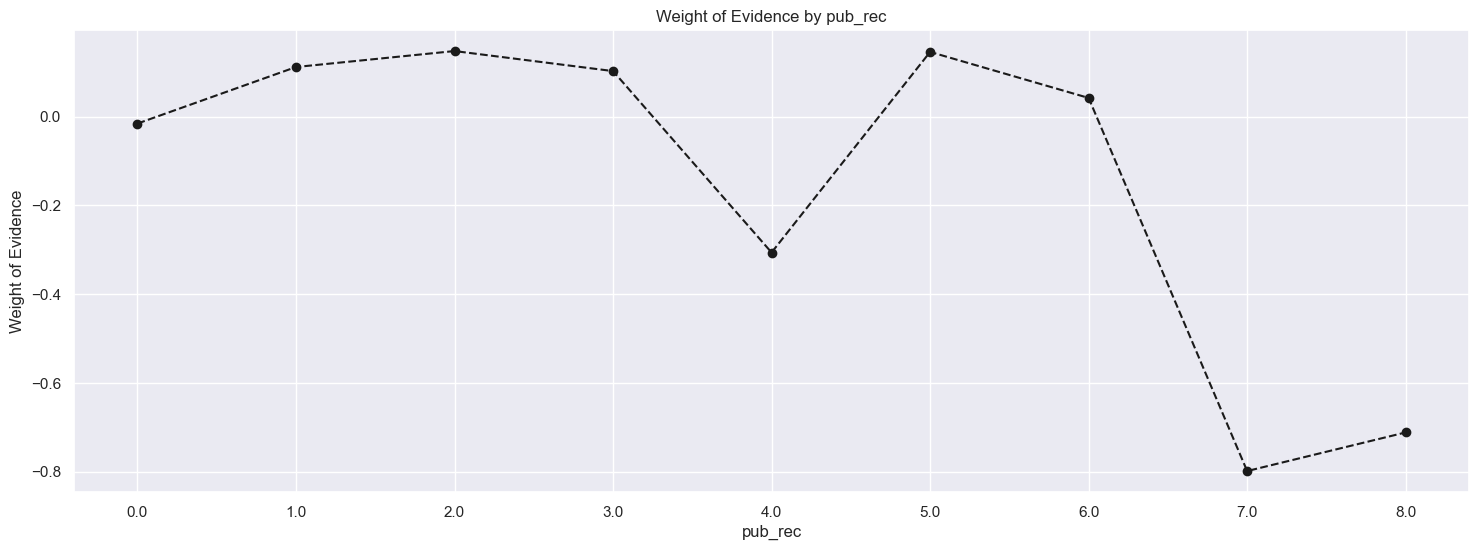

In [96]:
plot_by_woe(df_temp)

In [97]:
df_inputs_prepr['pub_rec:0'] = np.where((df_inputs_prepr['pub_rec'] == 0), 1, 0)
df_inputs_prepr['pub_rec:1'] = np.where((df_inputs_prepr['pub_rec'] == 1), 1, 0)
df_inputs_prepr['pub_rec:2-3'] = np.where((df_inputs_prepr['pub_rec'] >= 2) & (df_inputs_prepr['pub_rec'] <= 3), 1, 0)
df_inputs_prepr['pub_rec:>=4'] = np.where((df_inputs_prepr['pub_rec'] >= 4), 1, 0)

#### 6.2.12. total_acc

In [98]:
df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 10)

In [99]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_acc_factor', df_targets_prepr)
df_temp

total_acc_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0   (-0.156, 15.6]  19916   0.877435    0.213560  17475.0  2441.0   
1     (15.6, 31.2]  49246   0.892316    0.528068  43943.0  5303.0   
2     (31.2, 46.8]  19332   0.899441    0.207298  17388.0  1944.0   
3     (46.8, 62.4]   4241   0.897194    0.045476   3805.0   436.0   
4     (62.4, 78.0]    472   0.875000    0.005061    413.0    59.0   
5     (78.0, 93.6]     45   0.844444    0.000483     38.0     7.0   
6    (93.6, 109.2]      4   1.000000    0.000043      4.0     0.0   
7   (109.2, 124.8]      0        NaN    0.000000      NaN     NaN   
8   (124.8, 140.4]      0        NaN    0.000000      NaN     NaN   
9   (140.4, 156.0]      1   1.000000    0.000011      1.0     0.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.210372    0.239549 -0.129877             NaN       NaN  inf  
1     0.529007    0.520412  0.016380        0.318634  0.146257  inf  
2     0.209325    0.190775  0.092792        0.319682  0.076412  inf  
3     0.045806    0.042787  0.068188        0.163519  0.024604  inf  
4     0.004972    0.005790 -0.152331        0.040835  0.220519  inf  
5     0.000457    0.000687 -0.406565        0.004514  0.254234  inf  
6     0.000048    0.000000       inf        0.000409       inf  inf  
7          NaN         NaN       NaN             NaN       NaN  inf  
8          NaN         NaN       NaN             NaN       NaN  inf  
9     0.000012    0.000000       inf             NaN       NaN  inf

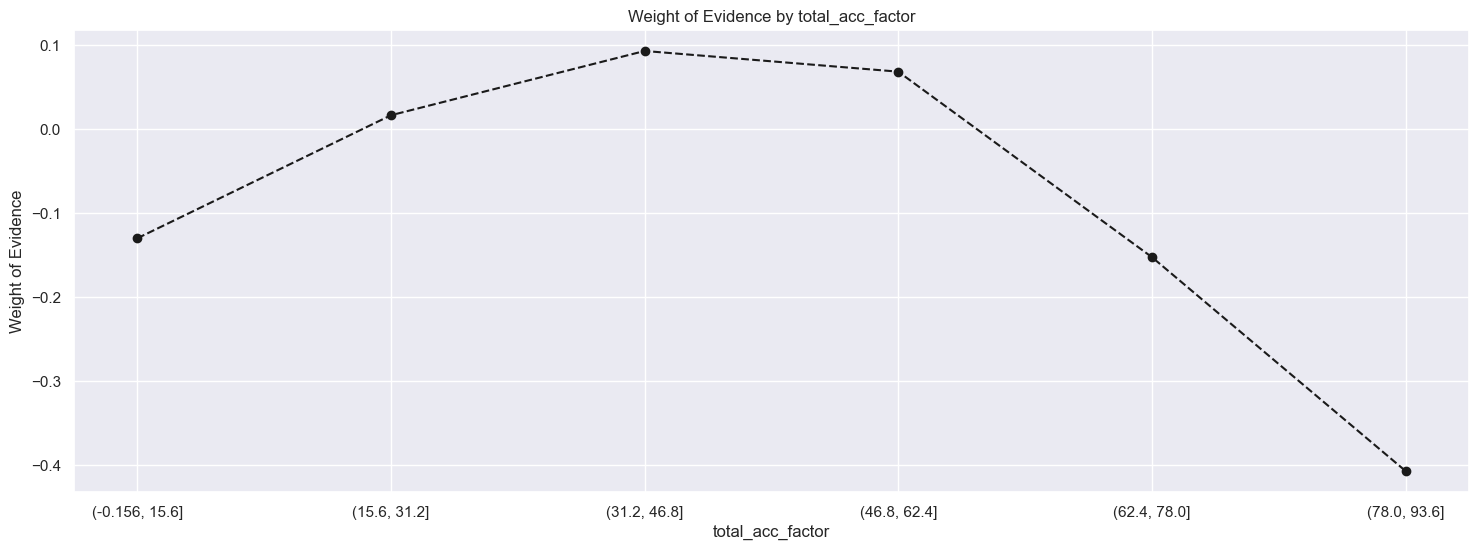

In [100]:
plot_by_woe(df_temp)

In [101]:
df_inputs_prepr['total_acc:<15.0'] = np.where(df_inputs_prepr['total_acc_factor'].isin([-0.15, 15]), 1, 0)
df_inputs_prepr['total_acc:15- 30'] = np.where(df_inputs_prepr['total_acc_factor'].isin([15,  30]), 1, 0)
df_inputs_prepr['total_acc:30-60'] = np.where(df_inputs_prepr['total_acc_factor'].isin([30, 60]), 1, 0)
df_inputs_prepr['total_acc:>60'] = np.where(df_inputs_prepr['total_acc_factor'].isin([60, 150]), 1, 0)

#### 6.2.13. acc_now_delinq

In [102]:
df_inputs_prepr['acc_now_delinq'].unique()

array([0., 1., 2., 3.])

In [103]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'acc_now_delinq', df_targets_prepr)
df_temp

acc_now_delinq  n_obs  prop_good  prop_n_obs   n_good    n_bad  \
0             0.0  92871   0.890827    0.995861  82732.0  10139.0   
1             1.0    360   0.872222    0.003860    314.0     46.0   
2             2.0     22   0.818182    0.000236     18.0      4.0   
3             3.0      4   0.750000    0.000043      3.0      1.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.995967    0.994995  0.000976             NaN       NaN  0.000298  
1     0.003780    0.004514 -0.177489        0.992187  0.178466  0.000298  
2     0.000217    0.000393 -0.594163        0.003563  0.416674  0.000298  
3     0.000036    0.000098 -0.999628        0.000181  0.405465  0.000298

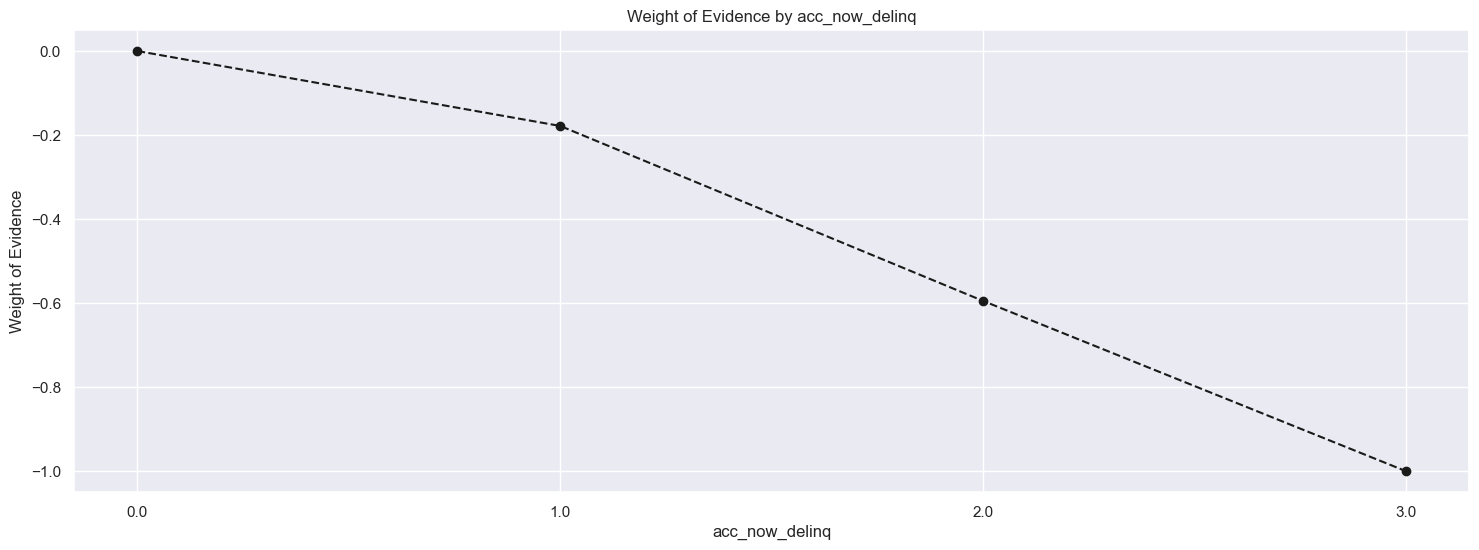

In [104]:
plot_by_woe(df_temp)

In [105]:
df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

#### 6.2.14. total_rev_hi_lim

In [106]:
df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 200)

In [107]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_targets_prepr)
df_temp

total_rev_hi_lim_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0       (-2013.133, 10065.665]  19473   0.869409    0.208810  16930.0  2543.0   
1        (10065.665, 20131.33]  27295   0.880198    0.292686  24025.0  3270.0   
2        (20131.33, 30196.995]  17910   0.892853    0.192050  15991.0  1919.0   
3        (30196.995, 40262.66]  10817   0.897938    0.115991   9713.0  1104.0   
4        (40262.66, 50328.325]   6469   0.915134    0.069367   5920.0   549.0   
5        (50328.325, 60393.99]   3891   0.917245    0.041723   3569.0   322.0   
6        (60393.99, 70459.655]   2413   0.925818    0.025875   2234.0   179.0   
7        (70459.655, 80525.32]   1472   0.930027    0.015784   1369.0   103.0   
8        (80525.32, 90590.985]    985   0.925888    0.010562    912.0    73.0   
9       (90590.985, 100656.65]    626   0.944089    0.006713    591.0    35.0   
10     (100656.65, 110722.315]    428   0.957944    0.004589    410.0    18.0   
11     (110722.315, 120787.98]    309   0.941748    0.003313    291.0    18.0   
12     (120787.98, 130853.645]    224   0.950893    0.002402    213.0    11.0   
13     (130853.645, 140919.31]    177   0.949153    0.001898    168.0     9.0   
14     (140919.31, 150984.975]    129   0.945736    0.001383    122.0     7.0   
15     (150984.975, 161050.64]    105   0.971429    0.001126    102.0     3.0   
16     (161050.64, 171116.305]     76   0.907895    0.000815     69.0     7.0   
17     (171116.305, 181181.97]     70   0.971429    0.000751     68.0     2.0   
18     (181181.97, 191247.635]     53   0.981132    0.000568     52.0     1.0   
19      (191247.635, 201313.3]     36   1.000000    0.000386     36.0     0.0   
20      (201313.3, 211378.965]     37   0.945946    0.000397     35.0     2.0   
21     (211378.965, 221444.63]     41   0.975610    0.000440     40.0     1.0   
22     (221444.63, 231510.295]     31   0.967742    0.000332     30.0     1.0   
23     (231510.295, 241575.96]     20   0.900000    0.000214     18.0     2.0   
24     (241575.96, 251641.625]     18   0.944444    0.000193     17.0     1.0   
25     (251641.625, 261707.29]     16   0.875000    0.000172     14.0     2.0   
26     (261707.29, 271772.955]     16   1.000000    0.000172     16.0     0.0   
27     (271772.955, 281838.62]     13   0.769231    0.000139     10.0     3.0   
28     (281838.62, 291904.285]     15   1.000000    0.000161     15.0     0.0   
29     (291904.285, 301969.95]     10   0.900000    0.000107      9.0     1.0   
30     (301969.95, 312035.615]      6   1.000000    0.000064      6.0     0.0   
31     (312035.615, 322101.28]      9   0.888889    0.000097      8.0     1.0   
32     (322101.28, 332166.945]      8   1.000000    0.000086      8.0     0.0   
33     (332166.945, 342232.61]      4   1.000000    0.000043      4.0     0.0   
34     (342232.61, 352298.275]      6   1.000000    0.000064      6.0     0.0   
35     (352298.275, 362363.94]      3   1.000000    0.000032      3.0     0.0   
36     (362363.94, 372429.605]      3   1.000000    0.000032      3.0     0.0   
37     (372429.605, 382495.27]      3   1.000000    0.000032      3.0     0.0   
38     (382495.27, 392560.935]      4   0.750000    0.000043      3.0     1.0   
39      (392560.935, 402626.6]      3   0.666667    0.000032      2.0     1.0   
40      (402626.6, 412692.265]      4   1.000000    0.000043      4.0     0.0   
41     (412692.265, 422757.93]      2   1.000000    0.000021      2.0     0.0   
42     (422757.93, 432823.595]      0        NaN    0.000000      NaN     NaN   
43     (432823.595, 442889.26]      0        NaN    0.000000      NaN     NaN   
44     (442889.26, 452954.925]      0        NaN    0.000000      NaN     NaN   
45     (452954.925, 463020.59]      1   1.000000    0.000011      1.0     0.0   
46     (463020.59, 473086.255]      2   0.500000    0.000021      1.0     1.0   
47     (473086.255, 483151.92]      3   1.000000    0.000032      3.0     0.0   
48     (483151.92, 493217.585]      1 

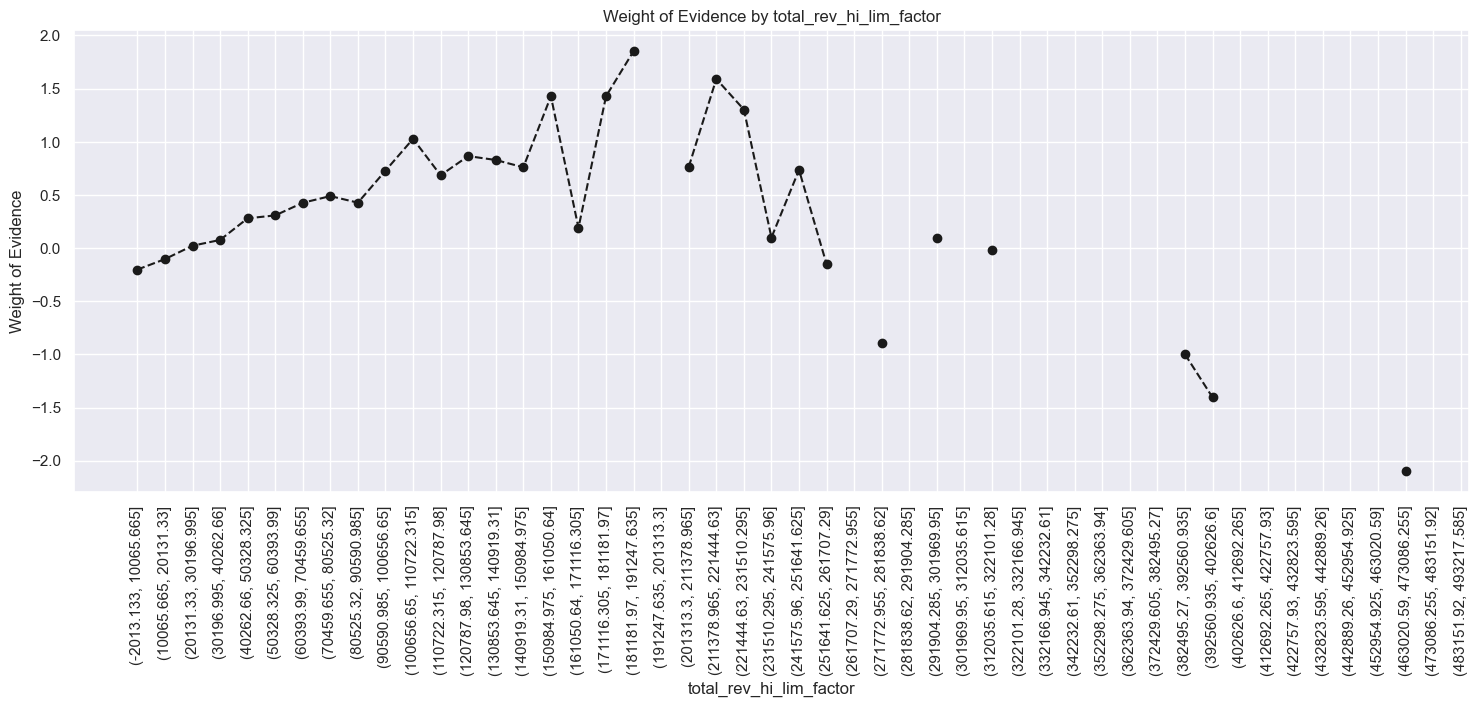

In [108]:
plot_by_woe(df_temp.iloc[: 50, : ], 90)

In [109]:
df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

#### 6.2.15 annual_inc

In [110]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
df_temp

annual_inc_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0      (-2695.2, 154704.0]  89203   0.889040    0.956529  79305.0  9898.0   
1     (154704.0, 304608.0]   3626   0.926641    0.038882   3360.0   266.0   
2     (304608.0, 454512.0]    282   0.929078    0.003024    262.0    20.0   
3     (454512.0, 604416.0]     86   0.965116    0.000922     83.0     3.0   
4     (604416.0, 754320.0]     23   0.956522    0.000247     22.0     1.0   
5     (754320.0, 904224.0]     18   0.944444    0.000193     17.0     1.0   
6    (904224.0, 1054128.0]      7   1.000000    0.000075      7.0     0.0   
7   (1054128.0, 1204032.0]      6   1.000000    0.000064      6.0     0.0   
8   (1204032.0, 1353936.0]      2   0.500000    0.000021      1.0     1.0   
9   (1353936.0, 1503840.0]      2   1.000000    0.000021      2.0     0.0   
10  (1503840.0, 1653744.0]      0        NaN    0.000000      NaN     NaN   
11  (1653744.0, 1803648.0]      0        NaN    0.000000      NaN     NaN   
12  (1803648.0, 1953552.0]      0        NaN    0.000000      NaN     NaN   
13  (1953552.0, 2103456.0]      0        NaN    0.000000      NaN     NaN   
14  (2103456.0, 2253360.0]      0        NaN    0.000000      NaN     NaN   
15  (2253360.0, 2403264.0]      0        NaN    0.000000      NaN     NaN   
16  (2403264.0, 2553168.0]      0        NaN    0.000000      NaN     NaN   
17  (2553168.0, 2703072.0]      0        NaN    0.000000      NaN     NaN   
18  (2703072.0, 2852976.0]      0        NaN    0.000000      NaN     NaN   
19  (2852976.0, 3002880.0]      0        NaN    0.000000      NaN     NaN   
20  (3002880.0, 3152784.0]      0        NaN    0.000000      NaN     NaN   
21  (3152784.0, 3302688.0]      0        NaN    0.000000      NaN     NaN   
22  (3302688.0, 3452592.0]      0        NaN    0.000000      NaN     NaN   
23  (3452592.0, 3602496.0]      0        NaN    0.000000      NaN     NaN   
24  (3602496.0, 3752400.0]      0        NaN    0.000000      NaN     NaN   
25  (3752400.0, 3902304.0]      0        NaN    0.000000      NaN     NaN   
26  (3902304.0, 4052208.0]      0        NaN    0.000000      NaN     NaN   
27  (4052208.0, 4202112.0]      0        NaN    0.000000      NaN     NaN   
28  (4202112.0, 4352016.0]      0        NaN    0.000000      NaN     NaN   
29  (4352016.0, 4501920.0]      0        NaN    0.000000      NaN     NaN   
30  (4501920.0, 4651824.0]      0        NaN    0.000000      NaN     NaN   
31  (4651824.0, 4801728.0]      0        NaN    0.000000      NaN     NaN   
32  (4801728.0, 4951632.0]      0        NaN    0.000000      NaN     NaN   
33  (4951632.0, 5101536.0]      0        NaN    0.000000      NaN     NaN   
34  (5101536.0, 5251440.0]      0        NaN    0.000000      NaN     NaN   
35  (5251440.0, 5401344.0]      0        NaN    0.000000      NaN     NaN   
36  (5401344.0, 5551248.0]      0        NaN    0.000000      NaN     NaN   
37  (5551248.0, 5701152.0]      0        NaN    0.000000      NaN     NaN   
38  (5701152.0, 5851056.0]      0        NaN    0.000000      NaN     NaN   
39  (5851056.0, 6000960.0]      0        NaN    0.000000      NaN     NaN   
40  (6000960.0, 6150864.0]      0        NaN    0.000000      NaN     NaN   
41  (6150864.0, 6300768.0]      0        NaN    0.000000      NaN     NaN   
42  (6300768.0, 6450672.0]      0        NaN    0.000000      NaN     NaN   
43  (6450672.0, 6600576.0]      0        NaN    0.000000      NaN     NaN   
44  (6600576.0, 6750480.0]      0        NaN    0.000000      NaN     NaN   
45  (6750480.0, 6900384.0]      0        NaN    0.000000      NaN     NaN   
46  (6900384.0, 7050288.0]      0        NaN    0.000000      NaN     NaN   
47  (7050288.0, 7200192.0]      0        NaN    0.000000      NaN     NaN   
48  (7200192.0, 7350096.0]      0        NaN    0.000000      NaN     NaN   
49  (7350096.0, 7500000.0]      2   1.000000    0.000021      2.0     0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.9

- The first interval contains more than 94% of all observations. Therefore, it seems like 50 categories were not quite enough to fine class the variable. In such cases we could try to split the variable into more than 50 classes. Let's say 100.

In [111]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 100)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
df_temp

annual_inc_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0       (-2695.2, 79752.0]  62621   0.877932    0.671488  54977.0  7644.0   
1      (79752.0, 154704.0]  26582   0.915206    0.285040  24328.0  2254.0   
2     (154704.0, 229656.0]   2916   0.926269    0.031268   2701.0   215.0   
3     (229656.0, 304608.0]    710   0.928169    0.007613    659.0    51.0   
4     (304608.0, 379560.0]    171   0.929825    0.001834    159.0    12.0   
5     (379560.0, 454512.0]    111   0.927928    0.001190    103.0     8.0   
6     (454512.0, 529464.0]     53   0.962264    0.000568     51.0     2.0   
7     (529464.0, 604416.0]     33   0.969697    0.000354     32.0     1.0   
8     (604416.0, 679368.0]     10   1.000000    0.000107     10.0     0.0   
9     (679368.0, 754320.0]     13   0.923077    0.000139     12.0     1.0   
10    (754320.0, 829272.0]      5   1.000000    0.000054      5.0     0.0   
11    (829272.0, 904224.0]     13   0.923077    0.000139     12.0     1.0   
12    (904224.0, 979176.0]      3   1.000000    0.000032      3.0     0.0   
13   (979176.0, 1054128.0]      4   1.000000    0.000043      4.0     0.0   
14  (1054128.0, 1129080.0]      3   1.000000    0.000032      3.0     0.0   
15  (1129080.0, 1204032.0]      3   1.000000    0.000032      3.0     0.0   
16  (1204032.0, 1278984.0]      2   0.500000    0.000021      1.0     1.0   
17  (1278984.0, 1353936.0]      0        NaN    0.000000      NaN     NaN   
18  (1353936.0, 1428888.0]      0        NaN    0.000000      NaN     NaN   
19  (1428888.0, 1503840.0]      2   1.000000    0.000021      2.0     0.0   
20  (1503840.0, 1578792.0]      0        NaN    0.000000      NaN     NaN   
21  (1578792.0, 1653744.0]      0        NaN    0.000000      NaN     NaN   
22  (1653744.0, 1728696.0]      0        NaN    0.000000      NaN     NaN   
23  (1728696.0, 1803648.0]      0        NaN    0.000000      NaN     NaN   
24  (1803648.0, 1878600.0]      0        NaN    0.000000      NaN     NaN   
25  (1878600.0, 1953552.0]      0        NaN    0.000000      NaN     NaN   
26  (1953552.0, 2028504.0]      0        NaN    0.000000      NaN     NaN   
27  (2028504.0, 2103456.0]      0        NaN    0.000000      NaN     NaN   
28  (2103456.0, 2178408.0]      0        NaN    0.000000      NaN     NaN   
29  (2178408.0, 2253360.0]      0        NaN    0.000000      NaN     NaN   
30  (2253360.0, 2328312.0]      0        NaN    0.000000      NaN     NaN   
31  (2328312.0, 2403264.0]      0        NaN    0.000000      NaN     NaN   
32  (2403264.0, 2478216.0]      0        NaN    0.000000      NaN     NaN   
33  (2478216.0, 2553168.0]      0        NaN    0.000000      NaN     NaN   
34  (2553168.0, 2628120.0]      0        NaN    0.000000      NaN     NaN   
35  (2628120.0, 2703072.0]      0        NaN    0.000000      NaN     NaN   
36  (2703072.0, 2778024.0]      0        NaN    0.000000      NaN     NaN   
37  (2778024.0, 2852976.0]      0        NaN    0.000000      NaN     NaN   
38  (2852976.0, 2927928.0]      0        NaN    0.000000      NaN     NaN   
39  (2927928.0, 3002880.0]      0        NaN    0.000000      NaN     NaN   
40  (3002880.0, 3077832.0]      0        NaN    0.000000      NaN     NaN   
41  (3077832.0, 3152784.0]      0        NaN    0.000000      NaN     NaN   
42  (3152784.0, 3227736.0]      0        NaN    0.000000      NaN     NaN   
43  (3227736.0, 3302688.0]      0        NaN    0.000000      NaN     NaN   
44  (3302688.0, 3377640.0]      0        NaN    0.000000      NaN     NaN   
45  (3377640.0, 3452592.0]      0        NaN    0.000000      NaN     NaN   
46  (3452592.0, 3527544.0]      0        NaN    0.000000      NaN     NaN   
47  (3527544.0, 3602496.0]      0        NaN    0.000000      NaN     NaN   
48  (3602496.0, 3677448.0]      0        NaN    0.000000      NaN     NaN   
49  (3677448.0, 3752400.0]      0        NaN    0.000000      NaN     NaN   
50  (3752400.0, 3827352.0]      0        NaN    0.000000      NaN     NaN   
51  (

- Create one dummy variable for people with very large income now and figure out what dummy variables we have to create for people with lower income next.
- Let's assume that $140,000 are the threshold above which people are considered to have a high income.

In [112]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 140000, : ]

In [113]:
df_inputs_prepr_temp["annual_inc_factor"] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'annual_inc_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

annual_inc_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0       (4664.8, 7504.0]     10   1.000000    0.000114    10.0    0.0   
1      (7504.0, 10208.0]     84   0.761905    0.000958    64.0   20.0   
2     (10208.0, 12912.0]    123   0.780488    0.001403    96.0   27.0   
3     (12912.0, 15616.0]    304   0.851974    0.003467   259.0   45.0   
4     (15616.0, 18320.0]    383   0.827676    0.004368   317.0   66.0   
5     (18320.0, 21024.0]    733   0.840382    0.008359   616.0  117.0   
6     (21024.0, 23728.0]    704   0.846591    0.008028   596.0  108.0   
7     (23728.0, 26432.0]   1785   0.861064    0.020356  1537.0  248.0   
8     (26432.0, 29136.0]   1355   0.853137    0.015452  1156.0  199.0   
9     (29136.0, 31840.0]   2292   0.854276    0.026137  1958.0  334.0   
10    (31840.0, 34544.0]   2130   0.855399    0.024290  1822.0  308.0   
11    (34544.0, 37248.0]   3525   0.853050    0.040198  3007.0  518.0   
12    (37248.0, 39952.0]   1926   0.880582    0.021963  1696.0  230.0   
13    (39952.0, 42656.0]   4973   0.867484    0.056710  4314.0  659.0   
14    (42656.0, 45360.0]   4038   0.875929    0.046048  3537.0  501.0   
15    (45360.0, 48064.0]   3015   0.880597    0.034382  2655.0  360.0   
16    (48064.0, 50768.0]   4397   0.878326    0.050142  3862.0  535.0   
17    (50768.0, 53472.0]   2898   0.885783    0.033048  2567.0  331.0   
18    (53472.0, 56176.0]   4143   0.873280    0.047245  3618.0  525.0   
19    (56176.0, 58880.0]   1810   0.883425    0.020641  1599.0  211.0   
20    (58880.0, 61584.0]   4726   0.881083    0.053894  4164.0  562.0   
21    (61584.0, 64288.0]   2246   0.895815    0.025613  2012.0  234.0   
22    (64288.0, 66992.0]   3455   0.895803    0.039400  3095.0  360.0   
23    (66992.0, 69696.0]   1965   0.907379    0.022408  1783.0  182.0   
24    (69696.0, 72400.0]   4096   0.899902    0.046709  3686.0  410.0   
25    (72400.0, 75104.0]   3495   0.897854    0.039856  3138.0  357.0   
26    (75104.0, 77808.0]    967   0.915202    0.011027   885.0   82.0   
27    (77808.0, 80512.0]   3571   0.901988    0.040723  3221.0  350.0   
28    (80512.0, 83216.0]   1319   0.924185    0.015041  1219.0  100.0   
29    (83216.0, 85920.0]   2274   0.899736    0.025932  2046.0  228.0   
30    (85920.0, 88624.0]   1144   0.905594    0.013046  1036.0  108.0   
31    (88624.0, 91328.0]   2425   0.924536    0.027654  2242.0  183.0   
32    (91328.0, 94032.0]   1141   0.911481    0.013012  1040.0  101.0   
33    (94032.0, 96736.0]   1562   0.913572    0.017813  1427.0  135.0   
34    (96736.0, 99440.0]    916   0.918122    0.010446   841.0   75.0   
35   (99440.0, 102144.0]   2307   0.902904    0.026308  2083.0  224.0   
36  (102144.0, 104848.0]    552   0.898551    0.006295   496.0   56.0   
37  (104848.0, 107552.0]   1094   0.932358    0.012476  1020.0   74.0   
38  (107552.0, 110256.0]   1562   0.915493    0.017813  1430.0  132.0   
39  (110256.0, 112960.0]    295   0.908475    0.003364   268.0   27.0   
40  (112960.0, 115664.0]    790   0.911392    0.009009   720.0   70.0   
41  (115664.0, 118368.0]    358   0.935754    0.004083   335.0   23.0   
42  (118368.0, 121072.0]   1473   0.918534    0.016798  1353.0  120.0   
43  (121072.0, 123776.0]    204   0.936275    0.002326   191.0   13.0   
44  (123776.0, 126480.0]    870   0.928736    0.009921   808.0   62.0   
45  (126480.0, 129184.0]    239   0.933054    0.002725   223.0   16.0   
46  (129184.0, 131888.0]    734   0.927793    0.008370   681.0   53.0   
47  (131888.0, 134592.0]    207   0.932367    0.002361   193.0   14.0   
48  (134592.0, 137296.0]    449   0.915367    0.005120   411.0   38.0   
49  (137296.0, 140000.0]    627   0.909091    0.007150   570.0   57.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.000128    0.000000       inf             NaN       NaN  inf  
1      0.000822    0.002043 -0.911157        0.000693       inf  inf  
2      0.001232    0.002758 -0.805796        0.000411  0.105361  inf  

In [114]:
plot_by_woe(df_temp, 90)

The weight of evidence increases almost monotonically with annual income, thus we can safely split the variable into some roughly equal intervals.

In [115]:
df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

#### 6.2.16. mths_since_last_delinq

- Create a dummy variable for missing months since last delinquency. This variable can have a value of one when months since last delinquency is missing and value of zero when it isn't missing.
- Then when it is not missing, the rest of the dummy variables will cover all the values after we do fine classing and coarse classing.

In [116]:
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

mths_since_last_delinq_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0                   (-0.17, 3.4]   1348   0.868694    0.031283  1171.0  177.0   
1                     (3.4, 6.8]   1890   0.880423    0.043861  1664.0  226.0   
2                    (6.8, 10.2]   3373   0.887044    0.078276  2992.0  381.0   
3                   (10.2, 13.6]   2496   0.895833    0.057924  2236.0  260.0   
4                   (13.6, 17.0]   3165   0.884044    0.073449  2798.0  367.0   
5                   (17.0, 20.4]   2282   0.893076    0.052958  2038.0  244.0   
6                   (20.4, 23.8]   2115   0.898345    0.049082  1900.0  215.0   
7                   (23.8, 27.2]   2755   0.895463    0.063934  2467.0  288.0   
8                   (27.2, 30.6]   1929   0.896319    0.044766  1729.0  200.0   
9                   (30.6, 34.0]   2453   0.891969    0.056926  2188.0  265.0   
10                  (34.0, 37.4]   1786   0.904255    0.041447  1615.0  171.0   
11                  (37.4, 40.8]   1765   0.887819    0.040960  1567.0  198.0   
12                  (40.8, 44.2]   2270   0.876211    0.052679  1989.0  281.0   
13                  (44.2, 47.6]   1664   0.899038    0.038616  1496.0  168.0   
14                  (47.6, 51.0]   1739   0.888442    0.040356  1545.0  194.0   
15                  (51.0, 54.4]   1158   0.887737    0.026873  1028.0  130.0   
16                  (54.4, 57.8]   1130   0.911504    0.026224  1030.0  100.0   
17                  (57.8, 61.2]   1423   0.895994    0.033023  1275.0  148.0   
18                  (61.2, 64.6]   1015   0.887685    0.023555   901.0  114.0   
19                  (64.6, 68.0]   1342   0.891952    0.031143  1197.0  145.0   
20                  (68.0, 71.4]    930   0.884946    0.021582   823.0  107.0   
21                  (71.4, 74.8]    928   0.889009    0.021536   825.0  103.0   
22                  (74.8, 78.2]   1195   0.907950    0.027732  1085.0  110.0   
23                  (78.2, 81.6]    768   0.880208    0.017823   676.0   92.0   
24                  (81.6, 85.0]    136   0.897059    0.003156   122.0   14.0   
25                  (85.0, 88.4]     10   1.000000    0.000232    10.0    0.0   
26                  (88.4, 91.8]      1   1.000000    0.000023     1.0    0.0   
27                  (91.8, 95.2]      2   1.000000    0.000046     2.0    0.0   
28                  (95.2, 98.6]      3   0.666667    0.000070     2.0    1.0   
29                 (98.6, 102.0]      4   1.000000    0.000093     4.0    0.0   
30                (102.0, 105.4]      2   1.000000    0.000046     2.0    0.0   
31                (105.4, 108.8]      3   1.000000    0.000070     3.0    0.0   
32                (108.8, 112.2]      1   1.000000    0.000023     1.0    0.0   
33                (112.2, 115.6]      1   1.000000    0.000023     1.0    0.0   
34                (115.6, 119.0]      2   1.000000    0.000046     2.0    0.0   
35                (119.0, 122.4]      2   1.000000    0.000046     2.0    0.0   
36                (122.4, 125.8]      1   1.000000    0.000023     1.0    0.0   
37                (125.8, 129.2]      0        NaN    0.000000     NaN    NaN   
38                (129.2, 132.6]      1   1.000000    0.000023     1.0    0.0   
39                (132.6, 136.0]      1   1.000000    0.000023     1.0    0.0   
40                (136.0, 139.4]      0        NaN    0.000000     NaN    NaN   
41                (139.4, 142.8]      0        NaN    0.000000     NaN    NaN   
42                (142.8, 146.2]      1   1.000000    0.000023     1.0    0.0   
43                (146.2, 149.6]      0        NaN    0.000000     NaN    NaN   
44                (149.6, 153.0]      0        NaN    0.000000     NaN    NaN   
45                (153.0, 156.4]      0        NaN    0.000000     NaN    NaN   
46                (156.4, 159.8]      0        NaN    0.000000     NaN    NaN   
47                (159.8, 163.2]      0        NaN    0.000000     NaN    NaN   
48                (163.2, 166.6]  

In [117]:
plot_by_woe(df_temp, 90)

In [118]:
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

#### 6.2.17. dti

In [119]:
df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'], 50)

In [120]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'dti_factor', df_targets_prepr)
df_temp

dti_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0       (-0.04, 0.8]    371   0.886792    0.003978   329.0   42.0   
1         (0.8, 1.6]    478   0.899582    0.005126   430.0   48.0   
2       (1.6, 2.399]    639   0.902973    0.006852   577.0   62.0   
3     (2.399, 3.199]    808   0.912129    0.008664   737.0   71.0   
4     (3.199, 3.999]   1047   0.916905    0.011227   960.0   87.0   
5     (3.999, 4.799]   1260   0.912698    0.013511  1150.0  110.0   
6     (4.799, 5.599]   1527   0.912901    0.016374  1394.0  133.0   
7     (5.599, 6.398]   1730   0.905202    0.018551  1566.0  164.0   
8     (6.398, 7.198]   1999   0.919960    0.021435  1839.0  160.0   
9     (7.198, 7.998]   2227   0.908846    0.023880  2024.0  203.0   
10    (7.998, 8.798]   2299   0.909526    0.024652  2091.0  208.0   
11    (8.798, 9.598]   2590   0.907336    0.027773  2350.0  240.0   
12   (9.598, 10.397]   2800   0.912143    0.030025  2554.0  246.0   
13  (10.397, 11.197]   3076   0.907672    0.032984  2792.0  284.0   
14  (11.197, 11.997]   3151   0.903205    0.033788  2846.0  305.0   
15  (11.997, 12.797]   3326   0.901383    0.035665  2998.0  328.0   
16  (12.797, 13.597]   3331   0.909937    0.035718  3031.0  300.0   
17  (13.597, 14.396]   3431   0.897115    0.036791  3078.0  353.0   
18  (14.396, 15.196]   3528   0.896259    0.037831  3162.0  366.0   
19  (15.196, 15.996]   3447   0.899333    0.036962  3100.0  347.0   
20  (15.996, 16.796]   3342   0.897367    0.035836  2999.0  343.0   
21  (16.796, 17.596]   3478   0.890454    0.037295  3097.0  381.0   
22  (17.596, 18.395]   3351   0.899731    0.035933  3015.0  336.0   
23  (18.395, 19.195]   3266   0.891304    0.035021  2911.0  355.0   
24  (19.195, 19.995]   3209   0.885011    0.034410  2840.0  369.0   
25  (19.995, 20.795]   3168   0.883838    0.033971  2800.0  368.0   
26  (20.795, 21.595]   2960   0.881757    0.031740  2610.0  350.0   
27  (21.595, 22.394]   2846   0.875615    0.030518  2492.0  354.0   
28  (22.394, 23.194]   2637   0.866894    0.028277  2286.0  351.0   
29  (23.194, 23.994]   2565   0.871345    0.027505  2235.0  330.0   
30  (23.994, 24.794]   2329   0.873336    0.024974  2034.0  295.0   
31  (24.794, 25.594]   2106   0.865147    0.022583  1822.0  284.0   
32  (25.594, 26.393]   1957   0.862034    0.020985  1687.0  270.0   
33  (26.393, 27.193]   1785   0.866667    0.019141  1547.0  238.0   
34  (27.193, 27.993]   1753   0.871078    0.018798  1527.0  226.0   
35  (27.993, 28.793]   1575   0.862222    0.016889  1358.0  217.0   
36  (28.793, 29.593]   1492   0.866622    0.015999  1293.0  199.0   
37  (29.593, 30.392]   1203   0.857855    0.012900  1032.0  171.0   
38  (30.392, 31.192]    931   0.862513    0.009983   803.0  128.0   
39  (31.192, 31.992]    874   0.862700    0.009372   754.0  120.0   
40  (31.992, 32.792]    797   0.855709    0.008546   682.0  115.0   
41  (32.792, 33.592]    718   0.862117    0.007699   619.0   99.0   
42  (33.592, 34.391]    704   0.859375    0.007549   605.0   99.0   
43  (34.391, 35.191]    471   0.872611    0.005051   411.0   60.0   
44  (35.191, 35.991]    148   0.912162    0.001587   135.0   13.0   
45  (35.991, 36.791]    135   0.866667    0.001448   117.0   18.0   
46  (36.791, 37.591]    110   0.936364    0.001180   103.0    7.0   
47   (37.591, 38.39]     99   0.868687    0.001062    86.0   13.0   
48    (38.39, 39.19]     82   0.841463    0.000879    69.0   13.0   
49    (39.19, 39.99]    101   0.891089    0.001083    90.0   11.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.003961    0.004122 -0.039853             NaN       NaN  0.032501  
1      0.005177    0.004711  0.094344        0.001216  0.134196  0.032501  
2      0.006946    0.006084  0.132467        0.001770  0.038124  0.032501  
3      0.008872    0.006968  0.241667        0.001926  0.109200  0.032501  
4      0.011557    0.008538  0.302785        0.002685  0.061117  0.032501  
5      0.013844    0.010795  0.248

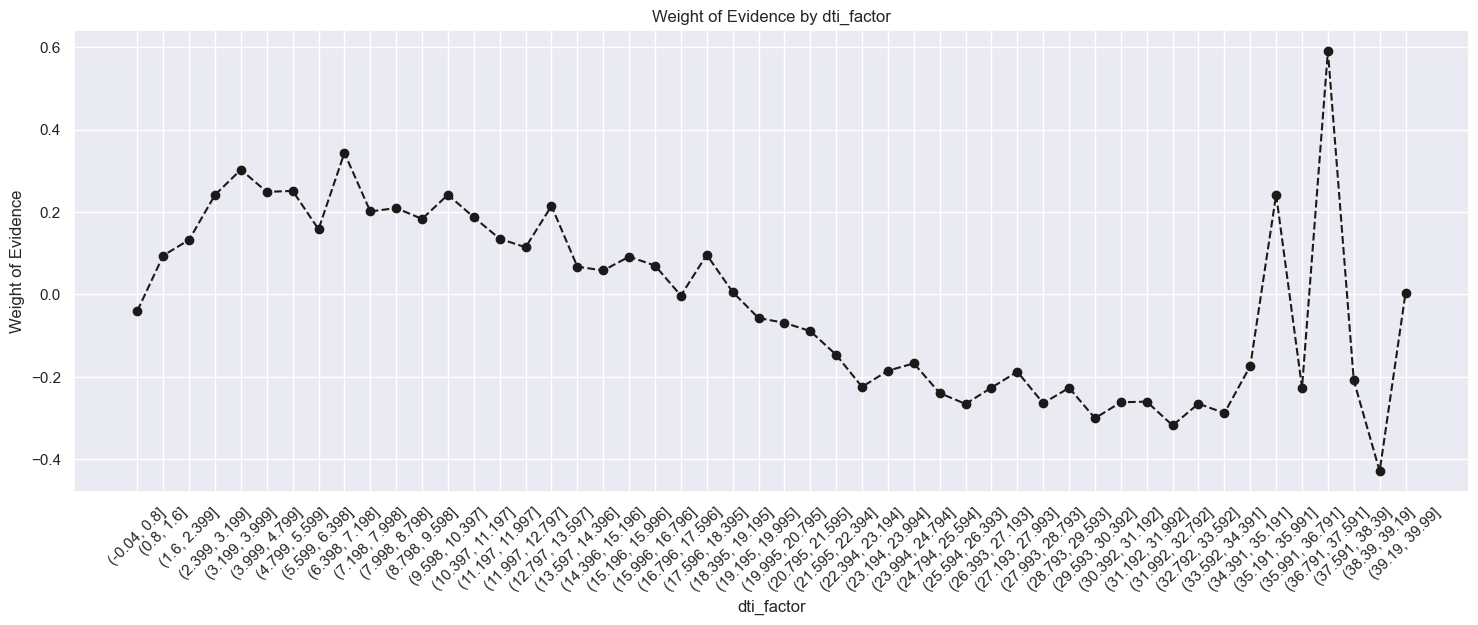

In [121]:
plot_by_woe(df_temp,45)

In [122]:
df_inputs_prepr['dti:<1.6'] = np.where((df_inputs_prepr['dti'] <= 1.6), 1, 0)
df_inputs_prepr['dti:1.6-3.199'] = np.where((df_inputs_prepr['dti'] > 1.6) & (df_inputs_prepr['dti'] <= 3.199), 1, 0)
df_inputs_prepr['dti:3.199-7.198'] = np.where((df_inputs_prepr['dti'] > 3.199) & (df_inputs_prepr['dti'] <= 7.198), 1, 0)
df_inputs_prepr['dti:7.198-11.19'] = np.where((df_inputs_prepr['dti'] > 7.198) & (df_inputs_prepr['dti'] <= 11.197), 1, 0)
df_inputs_prepr['dti:11.197-15.196'] = np.where((df_inputs_prepr['dti'] > 11.197) & (df_inputs_prepr['dti'] <= 15.196), 1, 0)
df_inputs_prepr['dti:15.196-15.996'] = np.where((df_inputs_prepr['dti'] > 15.196) & (df_inputs_prepr['dti'] <= 15.996), 1, 0)
df_inputs_prepr['dti:15.996-19.995'] = np.where((df_inputs_prepr['dti'] > 15.996) & (df_inputs_prepr['dti'] <= 19.995), 1, 0)
df_inputs_prepr['dti:19.995-23.194'] = np.where((df_inputs_prepr['dti'] > 19.995) & (df_inputs_prepr['dti'] <= 23.194), 1, 0)
df_inputs_prepr['dti:23.194-23.994'] = np.where((df_inputs_prepr['dti'] > 23.194) & (df_inputs_prepr['dti'] <= 23.994), 1, 0)
df_inputs_prepr['dti:23.994-25.594'] = np.where((df_inputs_prepr['dti'] > 23.994) & (df_inputs_prepr['dti'] <= 25.594), 1, 0)
df_inputs_prepr['dti:25.594-30.392'] = np.where((df_inputs_prepr['dti'] > 25.594) & (df_inputs_prepr['dti'] <= 30.392), 1, 0)
df_inputs_prepr['dti:>30.392'] = np.where((df_inputs_prepr['dti'] > 30.392), 1, 0)

#### 6.2.18. mths_since_last_record

In [123]:
df_inputs_prepr['mths_since_last_record'].unique()

array([ nan, 106., 110., 115.,   0.,  70.,  75.,  64.,  58., 105.,  85.,
       108.,  20.,  71.,  41.,  66.,  80.,  97.,  33.,  59.,  27., 113.,
        95.,  94.,  40.,  74., 117.,  99.,  23.,  81.,  51.,  67.,  82.,
       107.,  68.,  55., 103., 116.,  46.,  77.,  56.,  45.,   7., 109.,
        57.,  61.,  60.,  88.,  39.,  69., 100.,  24.,  54.,  86.,  42.,
        53., 114.,  48., 111.,  50., 104.,  76., 118.,   1.,  65.,  98.,
         8.,  44., 112.,  29.,  43.,  72.,  90.,  49.,  78.,  63.,  25.,
        73.,  30.,  52.,  89.,  37., 102.,  31.,  28., 119.,  87.,  34.,
        79.,  17.,  18.,  83.,  38., 101.,  14.,  84.,  32.,  91.,  93.,
        62.,  47.,  36.,  21.,  22.,  35.,  96.,  13.,  26.,   5.,  92.,
         9.,  11.,   4.,  15.,  16.,  12.,  10.,  19.,   3.,   6., 129.,
       120.,   2.])

In [124]:
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]
df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_record_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

mths_since_last_record_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0                 (-0.129, 2.58]    244   0.741803    0.019410   181.0   63.0   
1                   (2.58, 5.16]     36   0.888889    0.002864    32.0    4.0   
2                   (5.16, 7.74]     39   0.923077    0.003102    36.0    3.0   
3                  (7.74, 10.32]     66   0.939394    0.005250    62.0    4.0   
4                  (10.32, 12.9]     42   0.833333    0.003341    35.0    7.0   
5                  (12.9, 15.48]     69   0.869565    0.005489    60.0    9.0   
6                 (15.48, 18.06]     95   0.863158    0.007557    82.0   13.0   
7                 (18.06, 20.64]     58   0.965517    0.004614    56.0    2.0   
8                 (20.64, 23.22]    101   0.891089    0.008034    90.0   11.0   
9                  (23.22, 25.8]     94   0.946809    0.007478    89.0    5.0   
10                 (25.8, 28.38]    135   0.896296    0.010739   121.0   14.0   
11                (28.38, 30.96]    103   0.922330    0.008193    95.0    8.0   
12                (30.96, 33.54]    196   0.923469    0.015591   181.0   15.0   
13                (33.54, 36.12]    195   0.907692    0.015512   177.0   18.0   
14                 (36.12, 38.7]    166   0.909639    0.013205   151.0   15.0   
15                 (38.7, 41.28]    234   0.905983    0.018614   212.0   22.0   
16                (41.28, 43.86]    194   0.896907    0.015432   174.0   20.0   
17                (43.86, 46.44]    328   0.917683    0.026092   301.0   27.0   
18                (46.44, 49.02]    367   0.920981    0.029194   338.0   29.0   
19                 (49.02, 51.6]    231   0.943723    0.018376   218.0   13.0   
20                 (51.6, 54.18]    447   0.926174    0.035558   414.0   33.0   
21                (54.18, 56.76]    264   0.897727    0.021001   237.0   27.0   
22                (56.76, 59.34]    393   0.928753    0.031262   365.0   28.0   
23                (59.34, 61.92]    287   0.909408    0.022830   261.0   26.0   
24                 (61.92, 64.5]    405   0.920988    0.032217   373.0   32.0   
25                 (64.5, 67.08]    394   0.961929    0.031342   379.0   15.0   
26                (67.08, 69.66]    272   0.893382    0.021637   243.0   29.0   
27                (69.66, 72.24]    366   0.912568    0.029115   334.0   32.0   
28                (72.24, 74.82]    231   0.922078    0.018376   213.0   18.0   
29                 (74.82, 77.4]    350   0.920000    0.027842   322.0   28.0   
30                 (77.4, 79.98]    228   0.903509    0.018137   206.0   22.0   
31                (79.98, 82.56]    355   0.895775    0.028240   318.0   37.0   
32                (82.56, 85.14]    288   0.916667    0.022910   264.0   24.0   
33                (85.14, 87.72]    251   0.816733    0.019967   205.0   46.0   
34                 (87.72, 90.3]    345   0.889855    0.027444   307.0   38.0   
35                 (90.3, 92.88]    249   0.843373    0.019807   210.0   39.0   
36                (92.88, 95.46]    385   0.862338    0.030626   332.0   53.0   
37                (95.46, 98.04]    401   0.877805    0.031899   352.0   49.0   
38               (98.04, 100.62]    327   0.871560    0.026012   285.0   42.0   
39               (100.62, 103.2]    526   0.884030    0.041842   465.0   61.0   
40               (103.2, 105.78]    396   0.891414    0.031501   353.0   43.0   
41              (105.78, 108.36]    565   0.886726    0.044945   501.0   64.0   
42              (108.36, 110.94]    407   0.911548    0.032376   371.0   36.0   
43              (110.94, 113.52]    524   0.883588    0.041683   463.0   61.0   
44               (113.52, 116.1]    515   0.908738    0.040967   468.0   47.0   
45               (116.1, 118.68]    314   0.882166    0.024978   277.0   37.0   
46              (118.68, 121.26]     92   0.847826    0.007318    78.0   14.0   
47              (121.26, 123.84]      0        NaN    0.000000     NaN    NaN   
48              (123.84, 126.42]  

In [125]:
plot_by_woe(df_temp,45)

In [126]:
df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_record:<=2.42'] = np.where((df_inputs_prepr['mths_since_last_record'] <= 2.42), 1, 0)
df_inputs_prepr['mths_since_last_record:2.42-38.72'] = np.where((df_inputs_prepr['mths_since_last_record'] > 2.42) & (df_inputs_prepr['mths_since_last_record'] <= 38.72), 1, 0)
df_inputs_prepr['mths_since_last_record:38.72-48.4'] = np.where((df_inputs_prepr['mths_since_last_record'] > 38.72) & (df_inputs_prepr['mths_since_last_record'] <= 48.4), 1, 0)
df_inputs_prepr['mths_since_last_record:48.4-62.92'] = np.where((df_inputs_prepr['mths_since_last_record'] > 48.4) & (df_inputs_prepr['mths_since_last_record'] <= 62.92), 1, 0)
df_inputs_prepr['mths_since_last_record:62.92-65.34'] = np.where((df_inputs_prepr['mths_since_last_record'] > 62.92) & (df_inputs_prepr['mths_since_last_record'] <= 65.34), 1, 0)
df_inputs_prepr['mths_since_last_record:65.34-77.44'] = np.where((df_inputs_prepr['mths_since_last_record'] > 65.34) & (df_inputs_prepr['mths_since_last_record'] <= 77.44), 1, 0)
df_inputs_prepr['mths_since_last_record:77.44-82.28'] = np.where((df_inputs_prepr['mths_since_last_record'] > 77.44) & (df_inputs_prepr['mths_since_last_record'] <= 82.28), 1, 0)
df_inputs_prepr['mths_since_last_record:82.28-94.38'] = np.where((df_inputs_prepr['mths_since_last_record'] > 82.28) & (df_inputs_prepr['mths_since_last_record'] <= 94.38), 1, 0)
df_inputs_prepr['mths_since_last_record:94.38-106.48'] = np.where((df_inputs_prepr['mths_since_last_record'] > 94.38) & (df_inputs_prepr['mths_since_last_record'] <= 106.48), 1, 0)
df_inputs_prepr['mths_since_last_record:>106.48'] = np.where((df_inputs_prepr['mths_since_last_record'] > 106.48), 1, 0)

# IV. Export train, test files

In [127]:
# X_train = df_inputs_prepr
X_test = df_inputs_prepr

In [128]:
# X_train.shape
X_test.shape

(93257, 305)

In [129]:
# X_train.to_csv('X_train.csv')
# y_train.to_csv('y_train.csv')
X_test.to_csv('X_test.csv')
y_test.to_csv('y_test.csv')